# Прогнозирование оттока клиентов телекоммуникационной компании

## План работы и EDA

### Описание задачи

**Перед нами стоит следующая задача:** 

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Таким образом, нам предстоит решить задачу классификации - спрогнозировтаь уйдет клиент от нашей компании или нет.

**Описание данных:**

Данные состоят из файлов, полученных из разных источников:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

**Стобцы датасетов:**

- BeginDate – дата начала пользования услугами
- EndDate – дата окончания пользования услугами
- Type – тип оплаты: ежемесячный, годовой итд
- PaperlessBilling – безналичный расчет
- PaymentMethod – способ оплаты
- MonthlyCharges – ежемесячные траты на услуги
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

**Описание услуг**

Оператор предоставляет два **основных** типа услуг: 

- Стационарная телефонная связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### План работы:


1. **Изучение данных**

Выгрузка датасетов, ознакомление с данными, выгрузка информации о дататсетах

2. **Предобработка данных**

Приведение данных к приемлемому для дальнейшей работы виду (объединение данных, поиск и удаление пропусков, дубликатов, изменение типов данных итд)

3. **Исследовательский анализ данных**

Поиск, визуализация (посредством графиков и пояснений к ним) зависимостей, особенностей и аномалий в данных

4. **Подготовка данных**

Кодировка признаков, выделение целевого и сопутствующих признаков, определение конечного массива данных, на котором будет обучаться модель, разделение данных на выборки. Все эти операции необходимы для дальнейшего обучения и улучшения полученной модели

5. **Обучение моделей**

Выбор нескольких подходщих под нашу задачу моделей и обучение их на предобработанных и подготовленных данных, подбор наилучших гиперпараметров, применение кросс-валидации

6. **Тестирование модели**

Выбор лучшей по метрикам/быстродействию модели из обученных и ее тестирование, проверка модели на адекватность путем сравнения с константной моделью, проведение оценки важности лучшей модели, составление матрицы ошибок.

7. **Вывод-отчет по проделанной работе**

Интерпретация полученной на всех этапах работы информации через бизнес-показатели, визуализация результатов для наглядности (через графики, таблицы) 

Таким образом мы составили план нашей дальнейшей работы. Приступим к изучению данных. Перед этим предлагаю выгрузить все необходимые библиотеки для удобства.

#### Выгрузка необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgbm
from lightgbm import Dataset, LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
! pip install phik
import phik as ph

random_state = 3072023



     |████████████████████████████████| 679 kB 1.9 MB/s eta 0:00:01
















### Изучение данных

Выгрузим наши датасеты

In [2]:
contract = pd.read_csv('/datasets/contract_new.csv')
personal = pd.read_csv('/datasets/personal_new.csv')
internet = pd.read_csv('/datasets/internet_new.csv')
phone = pd.read_csv('/datasets/phone_new.csv')

#### Датасет с информацией о договоре

Выведем первые 10 строк датасета на экран, а затем применим метод info(), чтобы увидеть информацию о датасете.

In [3]:
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   customerID        7043 non-null   object 

 1   BeginDate         7043 non-null   object 

 2   EndDate           7043 non-null   object 

 3   Type              7043 non-null   object 

 4   PaperlessBilling  7043 non-null   object 

 5   PaymentMethod     7043 non-null   object 

 6   MonthlyCharges    7043 non-null   float64

 7   TotalCharges      7043 non-null   object 

dtypes: float64(1), object(7)

memory usage: 440.3+ KB


**По полученной информации видим:**

- Датасет состоит из 8 столбцов и 7043 строк


- Пропуски в датасете отсутствуют


- Столбцы с датами начала и окончания пользования услугами ('BeginDate' и 'EndDate') имеют тип "object" - в дальнейшем будет грамотнее перевести их в "datetime" для корректной работы


- Столбец 'TotalCarges' с общим количеством потраценных на услуги денег также имеет тип "object" - тоже необходимо будет перевести в 'float64'

#### Датасет с персональными данными клиентов

Как и с предыдущим датасетом, выведем интересующую информацию на экран.

In [5]:
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [6]:
personal.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   customerID     7043 non-null   object

 1   gender         7043 non-null   object

 2   SeniorCitizen  7043 non-null   int64 

 3   Partner        7043 non-null   object

 4   Dependents     7043 non-null   object

dtypes: int64(1), object(4)

memory usage: 275.2+ KB


**По полученной информации видим:**

- Датасет состоит из 5 столбцов и 7043 строк


- Пропуски в датасете отсутствуют


- Столбец о пенсионном возрасте ('SeniorCitizen') имеет значения 0/1, что соответствует нет/да - в дальнейшем заменим их на No/Yes для более удобного восприятия информации

#### Датасет с информацией об интернет-услугах

Изучим и этот датасет

In [7]:
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5517 entries, 0 to 5516

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype 

---  ------            --------------  ----- 

 0   customerID        5517 non-null   object

 1   InternetService   5517 non-null   object

 2   OnlineSecurity    5517 non-null   object

 3   OnlineBackup      5517 non-null   object

 4   DeviceProtection  5517 non-null   object

 5   TechSupport       5517 non-null   object

 6   StreamingTV       5517 non-null   object

 7   StreamingMovies   5517 non-null   object

dtypes: object(8)

memory usage: 344.9+ KB


**По полученной информации видим:**

- Датасет состоит из 8 столбцов и 5517 строк


- Пропуски в датасете отсутствуют

#### Датасет с информацией об услугах телефонии

По аналогии с предыдущими датасетами получим информацию

In [9]:
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6361 entries, 0 to 6360

Data columns (total 2 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   customerID     6361 non-null   object

 1   MultipleLines  6361 non-null   object

dtypes: object(2)

memory usage: 99.5+ KB


**По полученной информации видим:**

- Датасет состоит из 2 столбцов и 6361 строк


- Пропуски в датасете отсутствуют

**Подытожим:**

- Во всех 4-х датасетах нет пропусков


- Количество записей в датасетах 'contract' и 'personal' равны (7043 записи), но не совпадают с количеством записей в датасетах 'internet'(5517 записей) и 'phone' (6361 запись). Это можно объяснить тем, что датасеты 'phone' и 'internet' содержат информацию о предоставляемых телекоммуникационной компанией услугах, но это не значит, что совершенно все клиенты (из первых двух датасетов) пользуются и услугами интернета, и услугами телефонии одновременно. Это предположение мы проверим при более детальном анализе данных


- В датасете с информацией о договоре столбцы с датами начала и окончания пользования услугами ('BeginDate' и 'EndDate') имеют тип "object" - в дальнейшем переведем их в "datetime" для корректной работы, а столбец 'TotalCarges' с общим количеством потраценных на услуги денег, имеющий тип "object", переведем в 'float64'


- В датасете с персональными данными клиентов столбец о пенсионном возрасте ('SeniorCitizen') имеет значения 0/1, что соответствует нет/да - мы заменим их на No/Yes для более удобного восприятия информации



### Предобработка данных

Для удобства проведения предобработки данных объединим все 4 датасета в один общий. Объединять будем по единственному общему столбцу - CustomerId.

In [11]:
df = contract.set_index('customerID').join(phone.set_index('customerID')) #назовем датасет df
df = df.join(personal.set_index('customerID'))
df = df.join(internet.set_index('customerID'))

In [12]:
df.head(10) #выведем 10 строк общего датасета

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,NaN,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,NaN,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Yes,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Yes,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,NaN,Female,0,No,No,DSL,Yes,No,No,No,No,No
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Yes,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes


In [13]:
df.info() #и посмотрим информацию о нем

<class 'pandas.core.frame.DataFrame'>

Index: 7043 entries, 7590-VHVEG to 3186-AJIEK

Data columns (total 19 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   BeginDate         7043 non-null   object 

 1   EndDate           7043 non-null   object 

 2   Type              7043 non-null   object 

 3   PaperlessBilling  7043 non-null   object 

 4   PaymentMethod     7043 non-null   object 

 5   MonthlyCharges    7043 non-null   float64

 6   TotalCharges      7043 non-null   object 

 7   MultipleLines     6361 non-null   object 

 8   gender            7043 non-null   object 

 9   SeniorCitizen     7043 non-null   int64  

 10  Partner           7043 non-null   object 

 11  Dependents        7043 non-null   object 

 12  InternetService   5517 non-null   object 

 13  OnlineSecurity    5517 non-null   object 

 14  OnlineBackup      5517 non-null   object 

 15  DeviceProtection  5517 non-null   object 

 16  TechSupport

**Итого**, у нас получился датасет, состоящий из 19 столбцов и 7043 строк, но при этом есть пропуски. Разберемся с ними. 

In [14]:
del contract, phone, internet

In [15]:
df.isna().sum() #выведем информацию о количестве пропусков по столбцам

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

#### Замена пропусков

Предлагаю заменить пропуски на 'NotUsed', так как мы предположили ранее, что если стоит пропуск - вероятнее всего, услугой просто не пользовались. Такая замена будет здесь самой логичной для дальнейшей работы и понимания.

In [16]:
df.fillna('NotUsed', inplace=True)
df.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Пропуски заполнены. Перейдем к изменению типов значений.

#### Выделение целевого признака

В нашем датасете, перед изменением типов данных необходимо добавить столбец с целевым признаком. 

Так как нам необходимо понять уйдет клиент из компании или нет - логично добавить столбец с признаком является ли на данный момент человек нашим клиентом. 

Для этого добавим столбец Offline (человек "не в сети") со значениями 1 (если клиент ушел) и 0 (если клиент пользуется услугами компании). 

Соответственно, если в столбце с конечной датой стоит какая-либо дата - значит, человек ушел из компании. А если стоит No - человек все еще является клиентом. 

Выделим на основе этого целевой признак.

In [17]:
df['Offline'] = 1
df.loc[df['EndDate'] == 'No', 'Offline'] = 0

In [18]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,NotUsed,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No,0


#### Изменение типов данных

**Изменим типы данных в колонках начала/конца периода договора**

Как мы видим - в нашем датасете в графе "Окончание договора" стоит 'No', что подразумевает, что договор еще не окончился. Предлагаю заменить значения No на последнюю дату в нашем датасете. Тогда можно будет беспрепятственно поменять формат данных в datetime64 для обоих столбцов.

In [20]:
df['BeginDate'] = df['BeginDate'].astype('datetime64')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
df['EndDate'] = df['EndDate'].fillna('2020-02-01')
df['EndDate'] = df['EndDate'].astype('datetime64')

Проверим изменения

In [21]:
df.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,NotUsed,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No,0
9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,Yes,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,0
1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Yes,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,0
6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,NotUsed,Female,0,No,No,DSL,Yes,No,No,No,No,No,0
7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,Yes,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 7043 entries, 7590-VHVEG to 3186-AJIEK

Data columns (total 20 columns):

 #   Column            Non-Null Count  Dtype         

---  ------            --------------  -----         

 0   BeginDate         7043 non-null   datetime64[ns]

 1   EndDate           7043 non-null   datetime64[ns]

 2   Type              7043 non-null   object        

 3   PaperlessBilling  7043 non-null   object        

 4   PaymentMethod     7043 non-null   object        

 5   MonthlyCharges    7043 non-null   float64       

 6   TotalCharges      7043 non-null   object        

 7   MultipleLines     7043 non-null   object        

 8   gender            7043 non-null   object        

 9   SeniorCitizen     7043 non-null   int64         

 10  Partner           7043 non-null   object        

 11  Dependents        7043 non-null   object        

 12  InternetService   7043 non-null   object        

 13  OnlineSecurity    7043 non-null   object        



**В колонках BeginDate и EndDate данные успешно приведены к формату datetime64**

Перейдем к колонке **TotalCharges**

Тип данных 'object' может содержать любую информацию, поэтому для корректности поиска пропусков приведем колонку 'TotalCharges' к числовому формату. И проверим на пропуски

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [24]:
df['TotalCharges'].isna().sum()

11

Как оказалось - 11 значений не являются числами. Скорее всего, это только что присоединившиеся клиенты компании, у которых общая сумма оплаты равна месячной. Заполним эти значения соответствующими графами из столбца с месячной оплатой улуг.

In [25]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df[df['TotalCharges'].isna()]['MonthlyCharges']

Проверим что получилось

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 7043 entries, 7590-VHVEG to 3186-AJIEK

Data columns (total 20 columns):

 #   Column            Non-Null Count  Dtype         

---  ------            --------------  -----         

 0   BeginDate         7043 non-null   datetime64[ns]

 1   EndDate           7043 non-null   datetime64[ns]

 2   Type              7043 non-null   object        

 3   PaperlessBilling  7043 non-null   object        

 4   PaymentMethod     7043 non-null   object        

 5   MonthlyCharges    7043 non-null   float64       

 6   TotalCharges      7043 non-null   float64       

 7   MultipleLines     7043 non-null   object        

 8   gender            7043 non-null   object        

 9   SeniorCitizen     7043 non-null   int64         

 10  Partner           7043 non-null   object        

 11  Dependents        7043 non-null   object        

 12  InternetService   7043 non-null   object        

 13  OnlineSecurity    7043 non-null   object        



Как мы видим - тип данных в столбце изменился на float64. Действительно, дело было в недавних клиентах.

**Перейдем к столбцу 'SeniorCitizen'**

Заменим 0/1 на No/Yes соответственно

In [27]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes')

In [28]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,NotUsed,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,No,No,Fiber optic,No,No,No,No,No,No,0


Значения поменялись. Теперь проверим данные на **дубликаты по столбцам**

In [29]:
df.index.duplicated().sum()

0

Явные дубликаты отсутствуют. Перейдем к поиску аномальных значений и выбросов.

#### Поиск аномальных значений и выбросов

Для поиска аномальных значений построим диаграмму "ящик с усами", которая покажет нам есть ли такие значения в колнках с месячными и общими затратами на услуги компании.

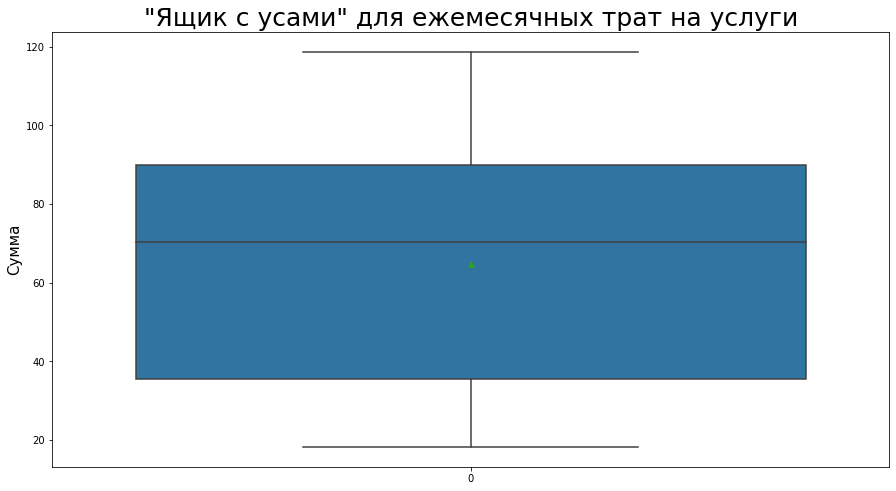

In [30]:
plt.figure(figsize=[15, 8])
plt.title('"Ящик с усами" для ежемесячных трат на услуги', fontsize = 25)
ax = sns.boxplot(data = df['MonthlyCharges'], showmeans=True)
ax.set_ylabel('Сумма', fontsize=15)
plt.show()

Выведем информацию о распределении

In [31]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Как видно из графика - выбросы отсутствуют. Максимальное значение 118,75, а минимальное - 18,25. Среднее значение в 64,76 отмечено стрелкой на графике.

Перейдем к общим тратам.

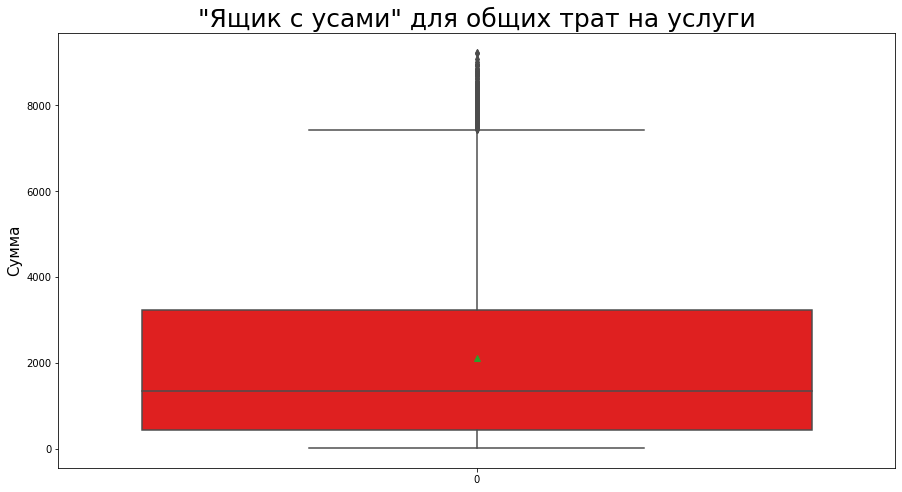

In [32]:
plt.figure(figsize=[15, 8])
plt.title('"Ящик с усами" для общих трат на услуги', fontsize = 25)
ax = sns.boxplot(data = df['TotalCharges'], showmeans=True, color='r')
ax.set_ylabel('Сумма', fontsize=15)
plt.show()

In [33]:
df['TotalCharges'].describe()

count    7043.000000
mean     2115.377573
std      2112.678861
min        19.050000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64

Здесь ситуация выглядит немного иначе - выбросы (точки за верхней частью графика) имет место быть. Проверим природу этих выбросов далее - по самым крупным клиентам в компании.

Построим график даты регистрации пользователей с высокой суммой затрат на услуги оператора. Для этого создадим новый датасет, где выделим сумму затрат и год регистрации. Индексы сбросим.

In [34]:
ss = df.copy()
ss.reset_index(inplace=True)
ss.drop(['customerID'], axis=1, inplace=True)#удаляем индексы - они нам не понадобятся
ss = ss.sort_values(by='TotalCharges', ascending=False)#располагаем таблицу по убыванию значений
ss.head(15)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline
4610,2013-10-01,2020-02-01,One year,Yes,Bank transfer (automatic),117.80,9221.38,Yes,Male,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
5558,2014-02-01,2020-02-01,Two year,Yes,Credit card (automatic),116.40,9218.88,Yes,Female,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
2559,2014-02-01,2020-02-01,Two year,Yes,Electronic check,115.55,9068.36,Yes,Male,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
4206,2014-02-01,2020-02-01,Two year,Yes,Credit card (automatic),116.80,8998.27,Yes,Female,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
540,2014-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),113.10,8957.52,Yes,Female,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
3820,2014-02-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),112.90,8941.68,Yes,Male,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
2689,2014-02-01,2020-02-01,Two year,Yes,Credit card (automatic),116.75,8910.36,Yes,Female,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
2603,2014-02-01,2020-02-01,Two year,Yes,Electronic check,114.90,8851.90,Yes,Female,No,No,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
850,2014-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),115.80,8837.86,Yes,Female,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0
4229,2014-02-01,2020-02-01,Two year,Yes,Credit card (automatic),115.75,8834.04,Yes,Female,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,0


Как видим из таблицы - пользователи, с наибольшими затратами пользовались всеми, предложенными услугами (и безопасность, и копирование, и поддержка итд.), а также у большинства подключен Интернет через оптоволокно. Эти клиенты пользовались перечисленными услугами в начале деятельности компании. 

Можно сделать предположение, что изначально, когда компания только выходила на рынок (13-14 года, Интернет-сервисы набирают популярность), при подключении клиентов предоставлялись каие-либо пакетные бонусы на пользование дополнительными услугами, а после люди попросту забывали отключать их, отсюда и самые "дорогие" - это самые "старые" договоры, которые действуют до сих пор, исходя из колонки с датой.

In [35]:
del ss #удалим таблицу

### Исследовательский анализ данных

Присупим к исследовательскому анализу данных. В данном пункте мы будем искать зависимости, особенности, аномалии в данных и визуализировать полученные наблюдения с помощью графиков.

Для начала рассмотрим распределение подключения и ухода клиентов по годам, чтобы иметь представление о всей картине деятельности компании.

#### Распределение новых подключений по годам

Начнем с распределения **новых подключенных** клиентов.Для этого построим график:

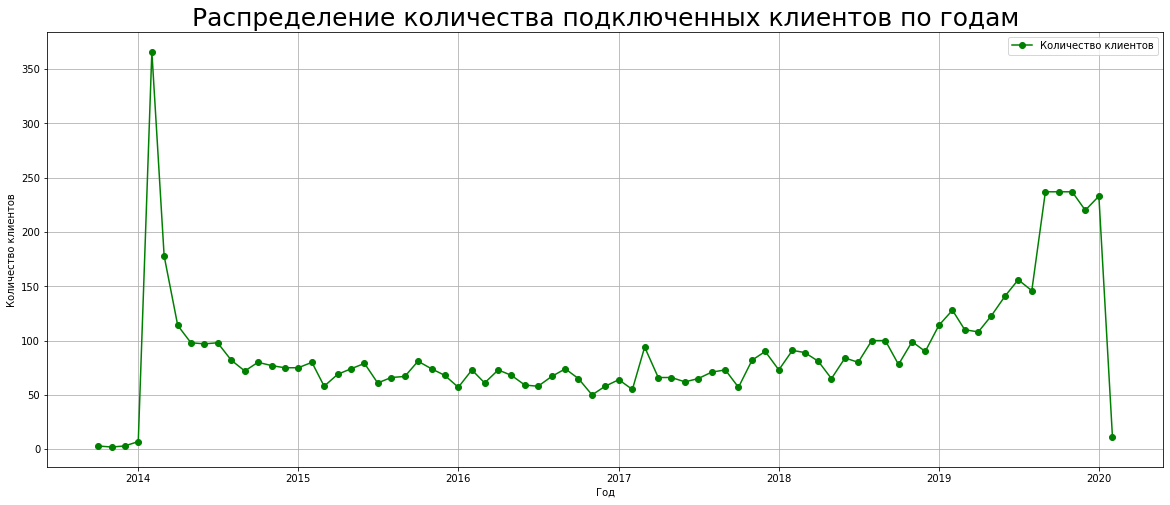

In [36]:
plt.figure(figsize=(20, 8))
plt.title('Распределение количества подключенных клиентов по годам', fontsize=25)
plt.ylabel('Количество клиентов')
plt.xlabel('Год')
plt.plot(df.join(df.index.to_frame()).groupby('BeginDate')['customerID'].count(),
         'o-',
         label='Количество клиентов',
         color='g')
plt.grid(True)
plt.legend();

Как видим из графика - наиболее часто новые клиенты появлялись в начале 2014 года, что может быть обусловлено резким ростом пользования услугами связи, а также первым проведением новогодних промоакций на подключение. Далее новые подключения не показывают какой-то определенной зависимости - можно предположить, что каких-либо серьезных промоакций не проводилось. Следющий рост новых пользователей фиксируется в конце 2019 года - повсеместное внедрение интернет-услуг и резкий спрос на подключения по всем регионам могли здесь сыграть свою роль, но это мы рассмотрим детально далее. Спад в конце графика происходит из-за того, что датасет заканчивается.

#### Распределение ухода клиентов по годам

Теперь рассмотрим аналогичный график по **уходу клиентов** из компании.

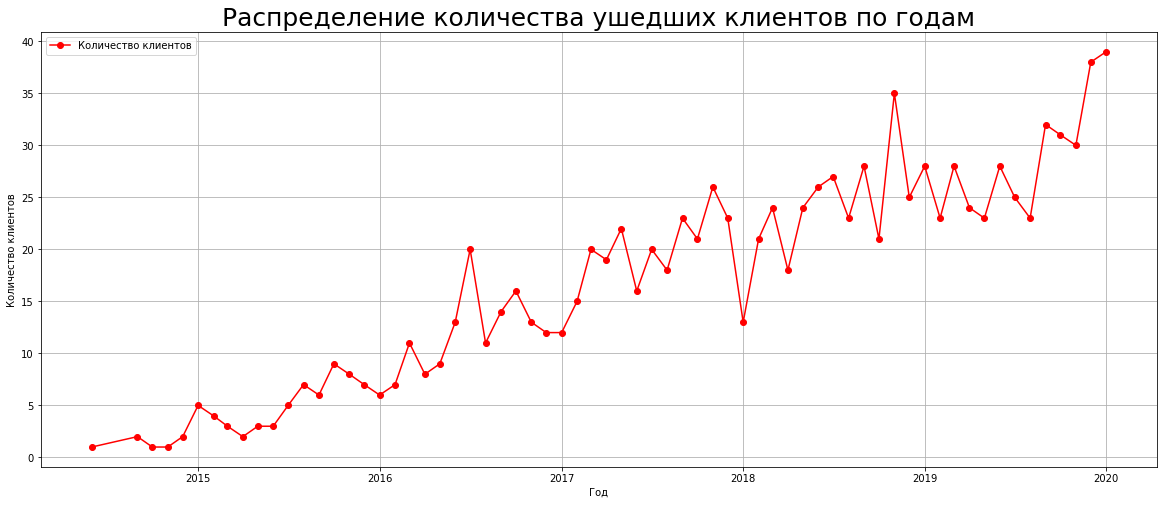

In [38]:
plt.figure(figsize=(20, 8))
plt.title('Распределение количества ушедших клиентов по годам', fontsize=25)
plt.ylabel('Количество клиентов')
plt.xlabel('Год')
plt.plot(df[df['EndDate'] != '2020-02-01'].join(df.index.to_frame()).groupby('EndDate')['customerID'].count(),
         'o-',
         label='Количество клиентов',
         color='r')
plt.grid(True)
plt.legend();

На графике видно, что по началу у компании отток клиентов минимальный, а затем этот показатель начинает расти. Можно предположить, что это связано с большой конкуренцией на рынке коммуникационных услуг, сложившейся в 2016-2020 года. Пик оттока приходится на конец 2018 - 2019 года, что следует из графика.

#### Количество предоставленных услуг по годам

Чтобы проверить гипотезы по оттоку распределению клиентов посмотрим на количество подключенных услуг по годам. Создадим столбцы начала и окончания пользования услугами (для этого из столбцов с датами вытащим только год), а затем выведем сводную таблицу по годам на экран.

In [39]:
df['BYear'] = df['BeginDate'].dt.year
df['EYear'] = df['EndDate'].dt.year

Создадим сводную таблицу services с информацией о предоставленных услугах.

In [40]:
count_internet = df[df['InternetService'] != 'No'].groupby(('BYear'))['InternetService'].count()
count_phone = df[df['MultipleLines'] != 'No'].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[df[f'{service}'] != 'No'].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

In [41]:
services.head(10)

,Internet,Telephone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
BYear,,,,,,,,
2013,8,8,5,5,7,6,7,7
2014,1344,1022,969,1088,1074,971,1043,1055
2015,852,549,494,573,560,493,594,600
2016,763,437,404,469,483,404,499,501
2017,845,458,392,451,460,410,495,497
2018,1030,469,468,494,508,470,584,580
2019,1957,668,676,741,730,679,882,888
2020,244,42,137,134,126,137,129,130


Как видим из талицы - самая популярная услуга "интернет". Средствами библиотеки seaborn построим тепловую карту, чтобы лучше визуализироваь распределение услуш.

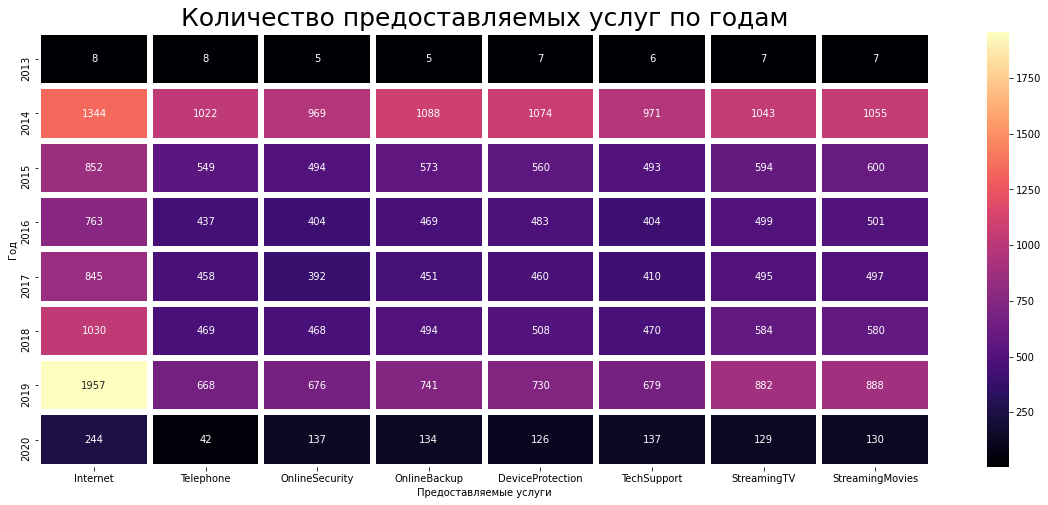

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Количество предоставляемых услуг по годам', fontsize=25)
ax = sns.heatmap(services, 
                 annot=True, 
                 cmap="magma", 
                 linewidths=5, 
                 fmt='.4g')
plt.ylabel('Год')
plt.xlabel('Предоставляемые услуги')
plt.show()


По нашему графику видно, что наибольшей популярностью за 2019 год, равно как и за все время существования компании, пользуются интрнет-подключения. Второе место делят между собой услуги телефонии и стриминговых сервисов. 

Значительно меньше (относительно предыдущих лет) стали выбирать услуги интернет-безопасности, облачного хранилища и технической поддержки. Действительно, такие сервисы в сегодняшних реалиях не пользуются огромным спросом и очень сильно проигрывают интернету и различным стриминговым платформам.

In [43]:
del count_internet, count_phone, services, df_phone, count, one_service

#### Типы оплаты

**Теперь рассмотрим наиболее предпочитаемые типы оплаты за оказанные услуги**. Напомним, у нас три типа оплаты - за месяц, год и на два года. Для этого построим столбчатую диаграмму.

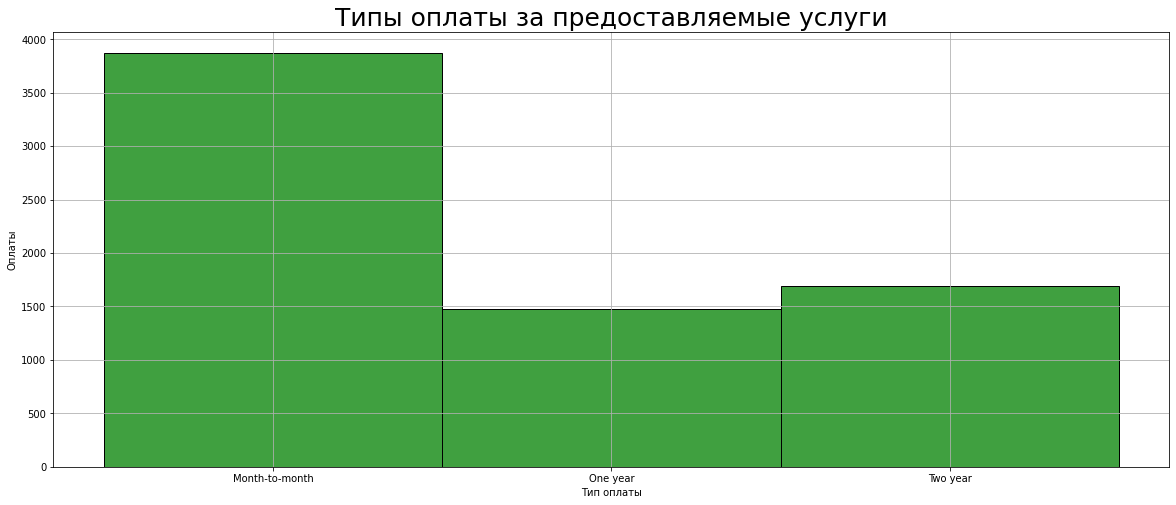

In [44]:
plt.figure(figsize=(20, 8))
plt.title('Типы оплаты за предоставляемые услуги', fontsize=25)
sns.histplot(df['Type'], color='g', kde=False);
plt.ylabel('Оплаты')
plt.xlabel('Тип оплаты')
plt.grid(True);

Как видим из диаграммы - самая частая оплата ежемесячная. Затем идет двухгодичный вариант оплаты, а замыкает тройку оплата на год.

Теперь посмотрим детально каким образом клиенты предпочитают платить - за наличные или безналично. Для этого из столбца "Безналичный рассчет" выведем диаграмму "да"/"нет" и на основании нее сделаем вывод.

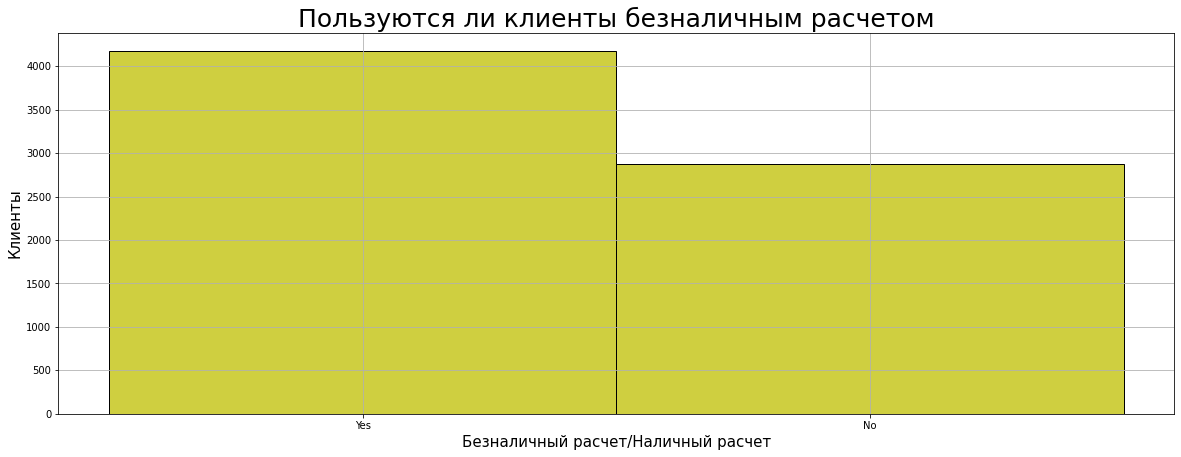

In [45]:
plt.figure(figsize=(20, 7))
plt.title('Пользуются ли клиенты безналичным расчетом', fontsize=25)
sns.histplot(df['PaperlessBilling'], color='y', kde=False);
plt.ylabel('Клиенты', fontsize=15)
plt.xlabel('Безналичный расчет/Наличный расчет', fontsize=15)
plt.grid(True);

Как видим из диаграммы - большинство клиентов выбирают именно безналичный способ оплаты, но также около 3000 из них пользуются наличными.

In [46]:
df['TotalCharges'].describe()

count    7043.000000
mean     2115.377573
std      2112.678861
min        19.050000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64

#### Зависимость предоставляемых услуг от семеного положения клиентов

Проверим - какие услуги наиболее популяярны у клиентов, состоящих в разном семейном положении. Для этого построим график зависимости

Для начала составим таблицу, где по годам будут распределены только клиенты, находящиеся в браке

In [47]:
count_internet = df[(df['InternetService'] != 'No') & (df['Partner'] == 'Yes')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['Partner'] == 'Yes')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['Partner'] == 'Yes')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)


In [48]:
services.head(10)

,Internet,Telephone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
BYear,,,,,,,,
2013,7,7,4,5,6,5,6,6
2014,1022,773,745,829,822,726,795,804
2015,540,355,314,370,349,316,382,384
2016,409,238,229,264,270,224,280,273
2017,413,224,192,212,238,204,248,259
2018,441,198,217,211,231,211,265,263
2019,529,190,211,228,220,205,254,243
2020,41,8,29,29,29,26,29,27


In [49]:
total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_married = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)


In [50]:
total_married.head()#проверим

,services,total
0,Internet,3402
6,StreamingTV,2259
7,StreamingMovies,2259
4,DeviceProtection,2165
3,OnlineBackup,2148


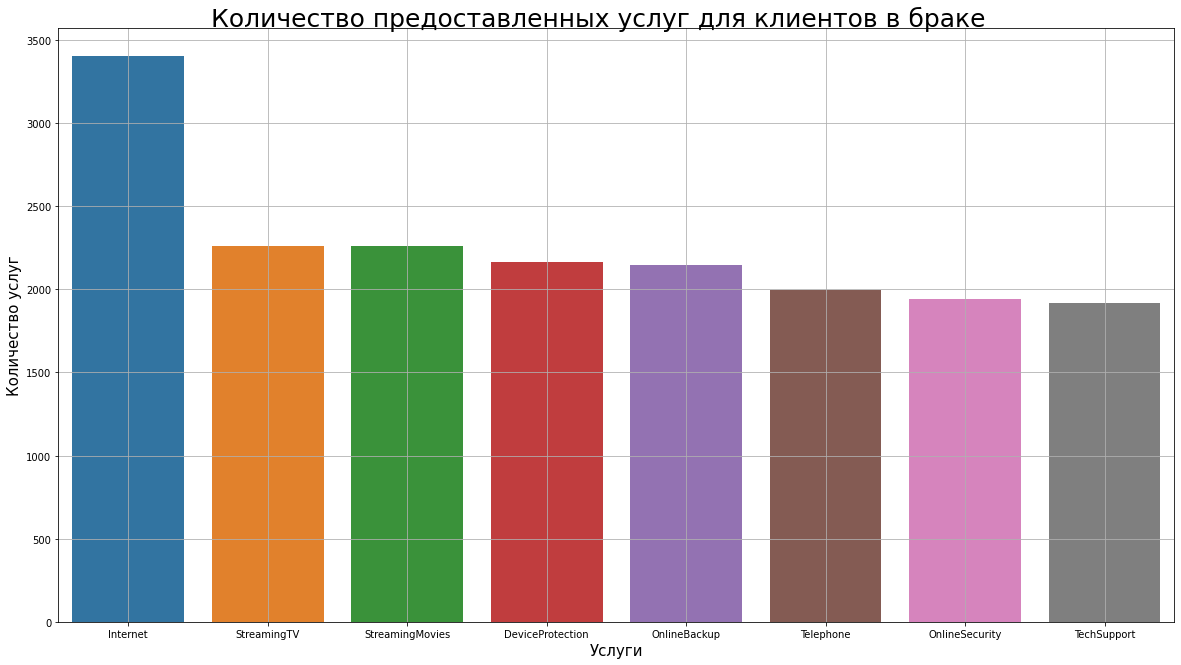

In [51]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов в браке', fontsize=25)
sns.barplot(x='services', y='total', data=total_married)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

Как видно из графика лидерами для клиентов в браке являются следующие услуги:
- Интернет
- Стриминговые сервисы (ТВ и кино)

Причем Интернет-услуги в значительном приоритете. Посмотрим на клиентов вне брака.

In [52]:
del count_internet, count_phone, services, df_phone, count, one_service

По аналогии с предыдущим пунктом создадим несколько переменных, затем общую, где просуммируем количество услуг и составим график.

In [53]:
count_internet = df[(df['InternetService'] != 'No') & (df['Partner'] == 'No')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['Partner'] == 'No')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['Partner'] == 'No')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

In [54]:
services.head(10)

,Internet,Telephone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
BYear,,,,,,,,
2013,1,1,1,NaN,1,1,1,1
2014,322,249,224,259.0,252,245,248,251
2015,312,194,180,203.0,211,177,212,216
2016,354,199,175,205.0,213,180,219,228
2017,432,234,200,239.0,222,206,247,238
2018,589,271,251,283.0,277,259,319,317
2019,1428,478,465,513.0,510,474,628,645
2020,203,34,108,105.0,97,111,100,103


In [55]:
total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_not_married = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)


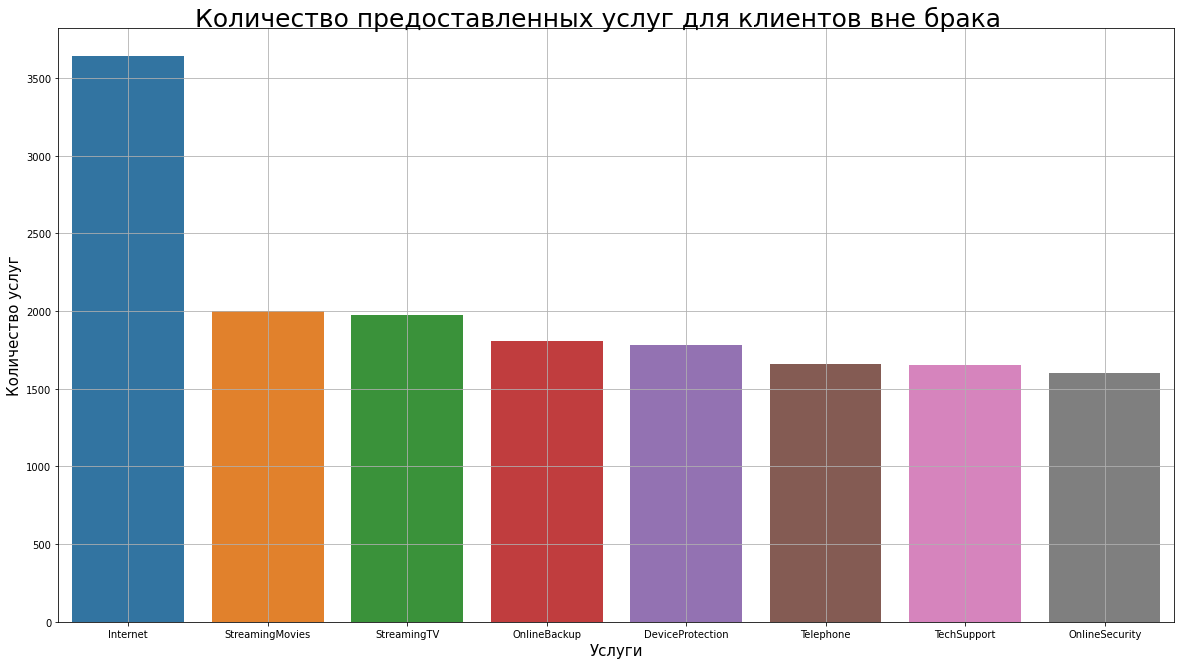

In [56]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов вне брака', fontsize=25)
sns.barplot(x='services', y='total', data=total_not_married)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

Здесь ситуация схожа - популярны также Интернет и стриминговые сервисы.

На основании увиденного можно сделать вывод, что на распределие популярности сервисов не влияет семейное положение клиента компании. Единственное, что можно отметить - это то, что холостые клиенты чаще подключают интернет и пользуются стримингом кино, а отличие от замужних/женатых.

In [57]:
del count_internet, count_phone, services, df_phone, count, one_service

In [58]:
del total_married, total_not_married

#### Зависимость предоставляемых услуг от возраста клиентов

Теперь, по аналогии с предыдущим исследованием посмотрим - как влияет возраст (пенсионный) клиента на распределение и количество потребляемых им услуг.

In [59]:
count_internet = df[(df['InternetService'] != 'No') & (df['SeniorCitizen'] == 'No')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['SeniorCitizen'] == 'No')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['SeniorCitizen'] == 'No')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

In [60]:
services.head(10)

,Internet,Telephone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
BYear,,,,,,,,
2013,6,6,4,3,5,5,5,5
2014,1125,836,845,911,911,848,874,884
2015,702,422,436,480,470,440,499,503
2016,636,346,363,406,425,371,417,416
2017,684,337,357,379,382,371,403,398
2018,860,375,431,434,455,439,499,488
2019,1656,522,638,680,656,648,783,787
2020,232,40,137,134,126,136,129,130


In [61]:
total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_no_senior = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

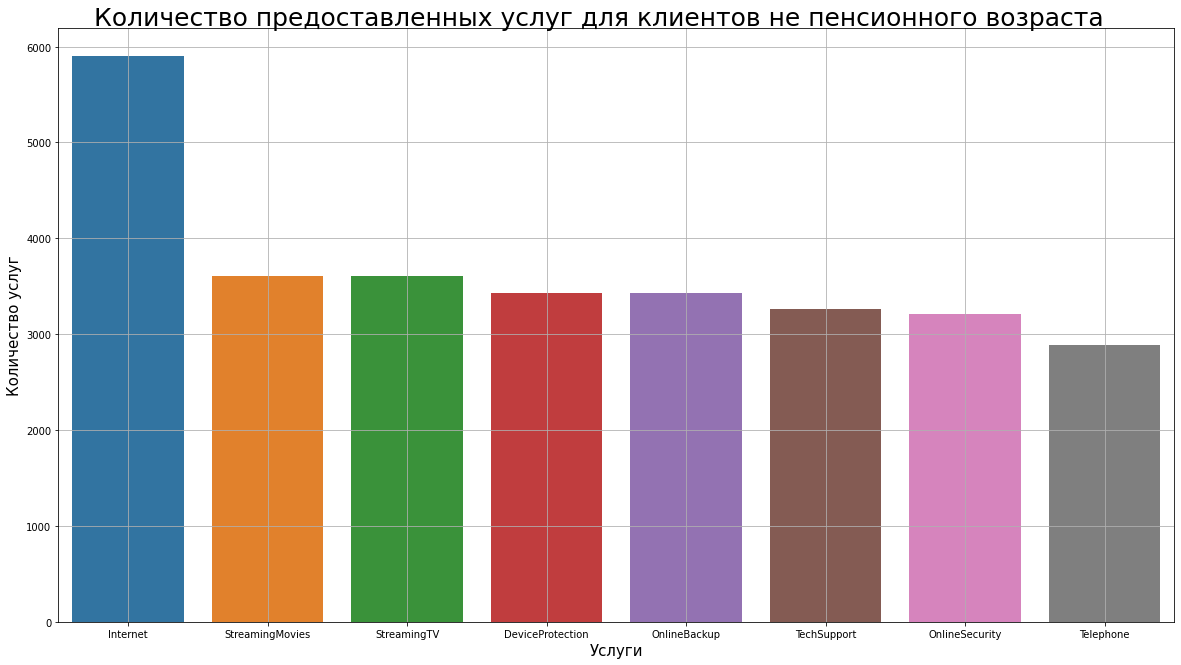

In [62]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов не пенсионного возраста', fontsize=25)
sns.barplot(x='services', y='total', data=total_no_senior)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

In [63]:
del count_internet, count_phone, services, df_phone, count, one_service

Здесь также наблюдается первостепенная роль интернет-услуг, а за ними по прежнему идут стриминговые сервисы. Перейдем к пенсионерам.

In [64]:
count_internet = df[(df['InternetService'] != 'No') & (df['SeniorCitizen'] == 'Yes')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['SeniorCitizen'] == 'Yes')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['SeniorCitizen'] == 'Yes')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

In [65]:
services.head(10)

,Internet,Telephone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
BYear,,,,,,,,
2013,2,2,1.0,2.0,2.0,1,2.0,2.0
2014,219,186,124.0,177.0,163.0,123,169.0,171.0
2015,150,127,58.0,93.0,90.0,53,95.0,97.0
2016,127,91,41.0,63.0,58.0,33,82.0,85.0
2017,161,121,35.0,72.0,78.0,39,92.0,99.0
2018,170,94,37.0,60.0,53.0,31,85.0,92.0
2019,301,146,38.0,61.0,74.0,31,99.0,101.0
2020,12,2,NaN,NaN,NaN,1,NaN,NaN


In [66]:
total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_senior = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

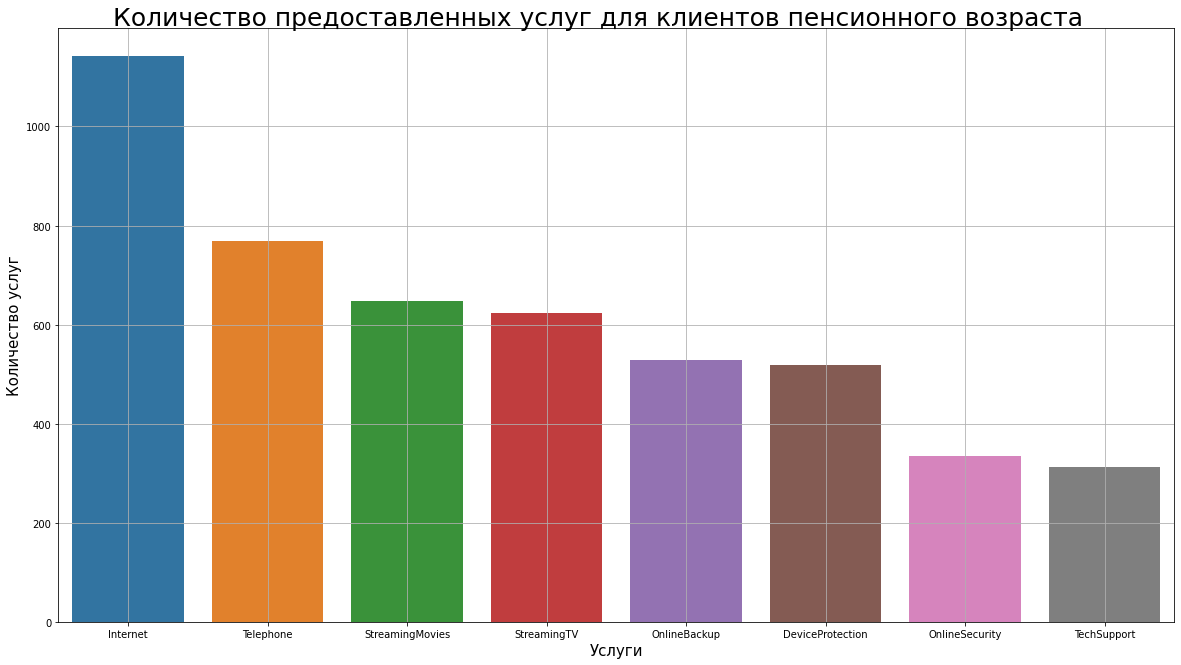

In [67]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов пенсионного возраста', fontsize=25)
sns.barplot(x='services', y='total', data=total_senior)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

У пожилых людей картина иная - несмотря на преобладание Интернет-услуг, на втором месте идет телефония, а только потом стриминговые сервисы.

Таким образом, можно сделать вывод - клиенты пенсионного и не пенсионного возраста по большей части пользуются услугами интернета, а вот телефоном пользуются в основном пенсионеры.

In [68]:
del count_internet, count_phone, services, df_phone, count, one_service

In [69]:
del total_no_senior, total_senior

#### Зависимость предоставляемых услуг от наличия детей у клиентов

Теперь точно также исследуем зависимости от наличия детей.

In [70]:
count_internet = df[(df['InternetService'] != 'No') & (df['Dependents'] == 'Yes')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['Dependents'] == 'Yes')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['Dependents'] == 'Yes')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

In [71]:
total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_with_children = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

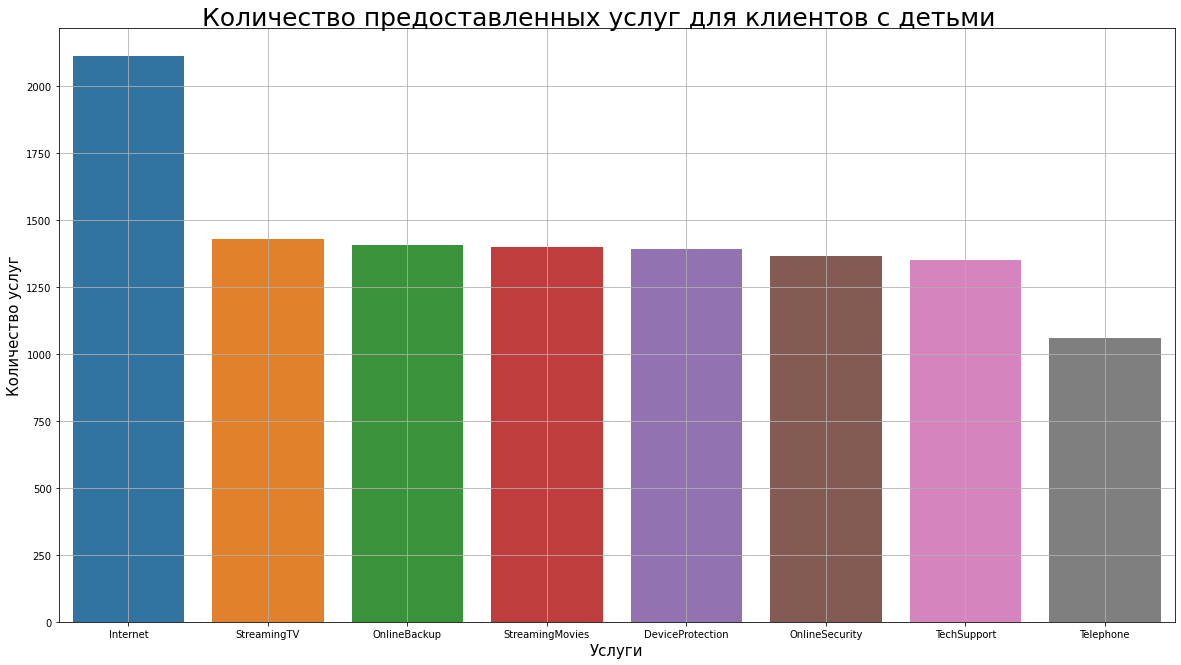

In [72]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов с детьми', fontsize=25)
sns.barplot(x='services', y='total', data=total_with_children)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

In [73]:
del count_internet, count_phone, services, df_phone, count, one_service

Как видим - если у клиентов имеются дети, то тройка наибольших позиций выглядит так:
- Интернет
- Стриминговое ТВ
- Резервное облачное хранилище

Это можно объяснить тем, что по ТВ идет много детских передач - отсюда и второе место по популярности. А облачные хранилища популярны возможно потому, что взрослые часто дают детям свои гаджеты, которые могут удалить с физического носителя какую-либо важную информацию, а облачное копирование позволяет восстановить все без особых проблем.

Перейдем к клиентам без детей.

In [74]:
count_internet = df[(df['InternetService'] != 'No') & (df['Dependents'] == 'No')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['Dependents'] == 'No')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['Dependents'] == 'No')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_without_children = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

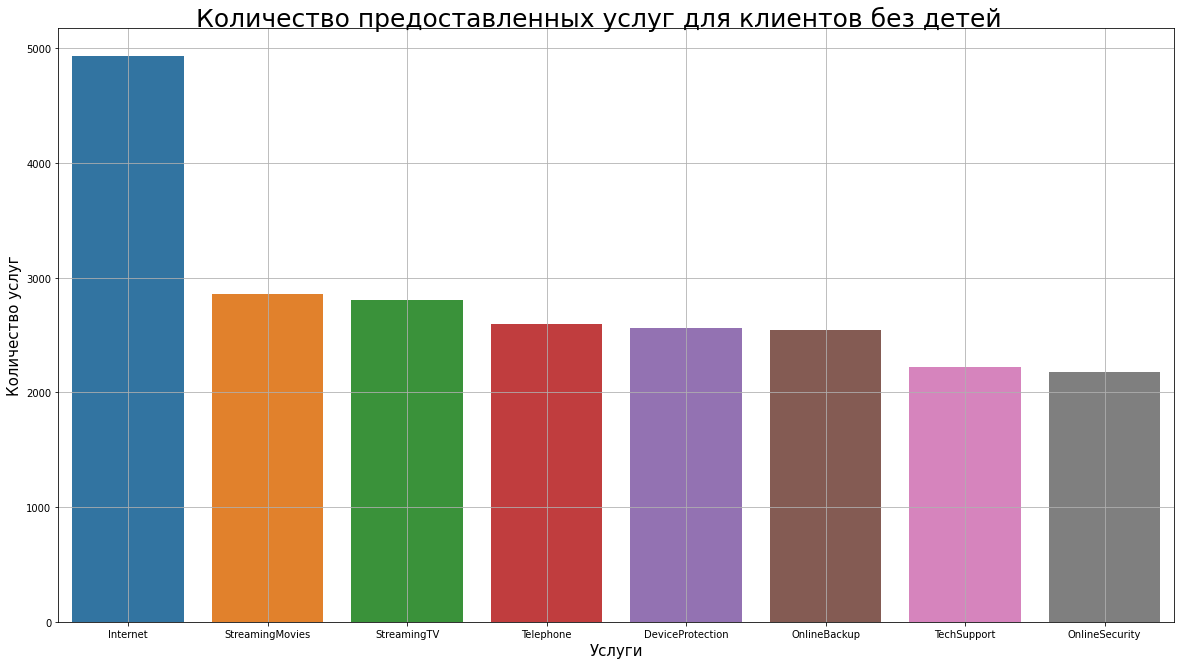

In [75]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов без детей', fontsize=25)
sns.barplot(x='services', y='total', data=total_without_children)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

Количество интернет-услуг у клиентов без детей в 2 раза больше, чем у тех, у кого есть дети. Также и стала иной вторая позиция - теперь это стриминговое кино. ТВ ушло на 3-е место.

In [76]:
del count_internet, count_phone, services, df_phone, count, one_service

In [77]:
del total_with_children, total_without_children

#### Зависимость предоставляемых услуг от пола

Теперь рассмотрим самые популярные услуги у мужчин и женщин. Начнем с женщин.

In [78]:
count_internet = df[(df['InternetService'] != 'No') & (df['gender'] == 'Female')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['gender'] == 'Female')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['gender'] == 'Female')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_female = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

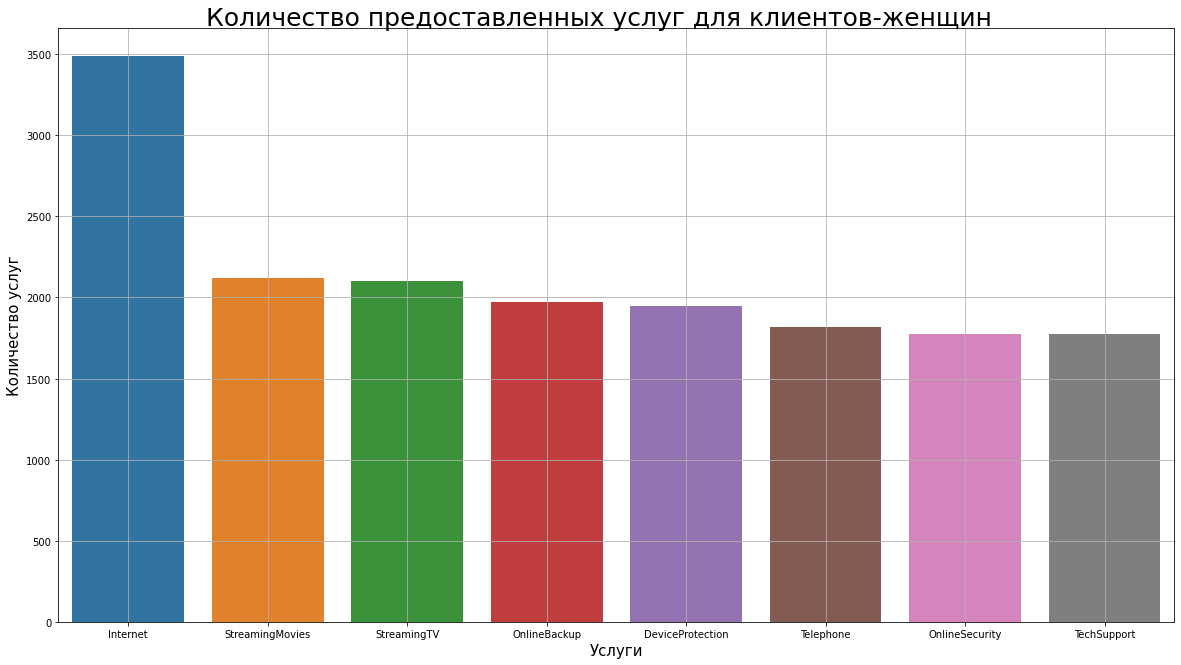

In [79]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов-женщин', fontsize=25)
sns.barplot(x='services', y='total', data=total_female)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

In [80]:
del count_internet, count_phone, services, df_phone, count, one_service

Как видим из графика - женщины также предпочитают пользоваться Интернет-услугами. На втором месте у них стриминговое кино, а затем ТВ. Посмотрим - что у мужчин.

In [81]:
count_internet = df[(df['InternetService'] != 'No') & (df['gender'] == 'Male')].groupby(('BYear'))['InternetService'].count()
count_phone = df[(df['MultipleLines'] != 'No') & (df['gender'] == 'Male')].groupby(('BYear'))['MultipleLines'].count()
services = pd.DataFrame({'BYear': count_internet.index, 'Internet': count_internet.values})
df_phone = pd.DataFrame({'BYear': count_phone.index, 'Telephone': count_phone.values})
services = services.merge(df_phone, on='BYear', how='outer')
for service in (['OnlineSecurity', 
                 'OnlineBackup', 
                 'DeviceProtection', 
                 'TechSupport', 
                 'StreamingTV', 
                 'StreamingMovies']):
    count = df[(df[f'{service}'] != 'No') & (df['gender'] == 'Male')].groupby(('BYear'))[f'{service}'].count()
    one_service = pd.DataFrame({'BYear': count.index, f'{service}': count.values})
    services = services.merge(one_service, on='BYear', how='outer')
services.index = count_internet.index
services.drop('BYear', axis=1, inplace=True)

total=[] #создаем пустую переменную, чтобы суммировать там количество услуг по каждой категории
for service in services.columns:
    total.append(services[service].sum())
total_male = pd.DataFrame({'services': services.columns, 'total': total}).sort_values(by = 'total', ascending=False)

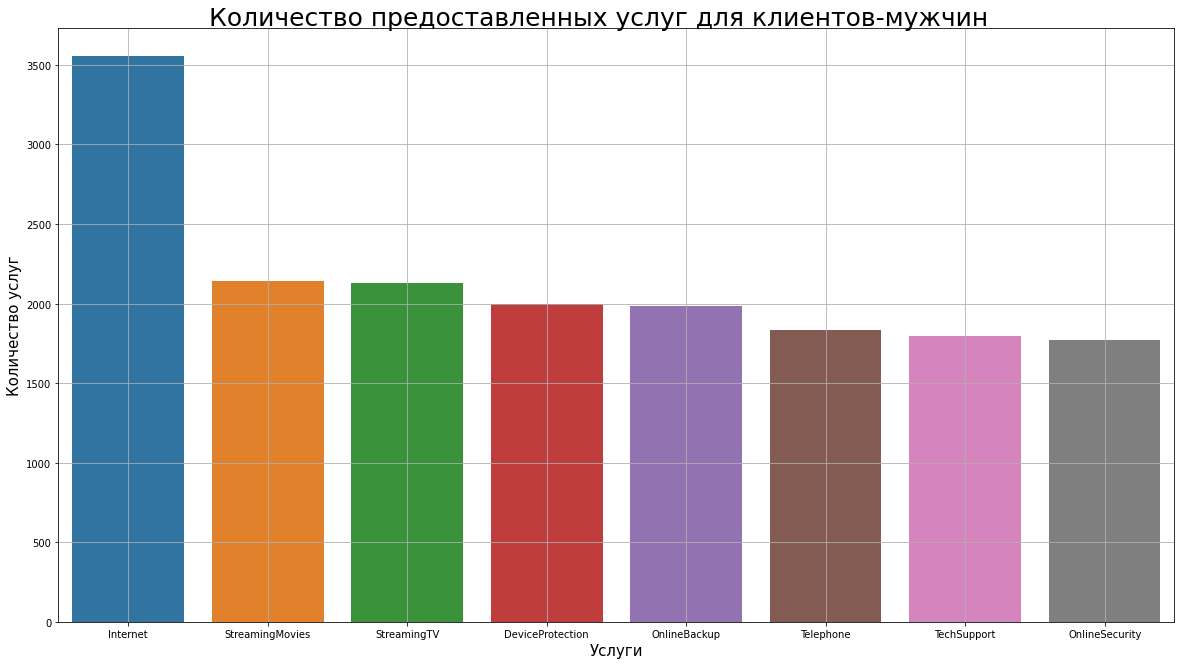

In [82]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('Количество предоставленных услуг для клиентов-мужчин', fontsize=25)
sns.barplot(x='services', y='total', data=total_male)
plt.ylabel('Количество услуг', fontsize=15)
plt.xlabel('Услуги', fontsize=15)
plt.grid(True)
plt.show()

У мужчин ситуация выглядит схоже, за исключением большего количество фактов использования Интернет-услуг, а также незначительных перемен местами услуг 4-7 мест.

In [83]:
del count_internet, count_phone, services, df_phone, count, one_service

In [84]:
del total_female, total_male

**Подытожим:**

Во всех доступных нам для исследования группах самый популярный сервис - это Интернет. Это неудивительно, потому что почти что все сейчас завязано на Интернете. В целом, в остальном картина схожая - стриминговые сервисы (ТВ и кино) делят между собой 2 и 3 места в разных группах исследуемых. При этом различаются только показатели - в каких-то группах подключается большее количество людей, а в каких-то меньшее. Интересной особенностью стало то, что у людей пенсионного возраста вторая по популярности услуга (после Интернета) - телефония.

#### Вывод

Таким образом анализ данных показал нам, что бум подключений пришелся на начало 2014 года, что может быть обусловлено резким ростом пользования услугами связи, а также первым проведением новогодних промоакций на подключение. Следющий рост новых пользователей фиксируется в конце 2019 года. 

Отток клиентов достигает своего пика в 2018-2019 годах, что может говорить о множестве конкурентов у компании, а таже отсутствии каких-либо интересных для пользователей предложений и промоакций. 

Как и говорилось ранее - наиболее популярные услуги это интернет и телефония. Они были самыми востребованными и в начале деятельности компании, остаются самыми востребоваными и по сей день. 

От семейного положения/возраста/наличия детей/пола популярность Интернета не зависит - он является самой популярной услугой. Клиенты пенсионного возраста, в отличие от всех остальных, предпочитают телефонию на втором месте, но значения там незначительные. В целом, по общей картине, можно сказать, что самые популярные услуги у различных групп - Интернет и стриминговые сервисы (кино и ТВ).

Наибольшей популярностью все равно пользуется интернет, так как является не просто развлекательным, но и очень важным информационным ресурсом для большого количества людей. 

Также стоит отметить, что самый популярный тип оплаты услуг компании - ежемесячный, причем подавляющее большинство пользуется безналичным способом оплаты.

## Код решения

### Подготовка данных

#### Добавление признаков

Нам неинтересна информация о том, когда абонент подключился, а когда отключился - вместо этого лучше сделать столбец со "сроком жизни" клиента в днях. Для этого из даты окончания договора вычтем дату начала. Новый столбец назовем Duration (длительность). Также, после, удалим столбцы с началом и окончанием договоров

In [85]:
df.drop(['BYear', 'EYear'], axis=1, inplace=True)

In [86]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,NotUsed,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,No,No,Fiber optic,No,No,No,No,No,No,0


In [87]:
df['Duration'] = (df['EndDate'] - df['BeginDate']).dt.days

In [88]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline,Duration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,No,...,No,DSL,No,Yes,No,No,No,No,0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,No,Male,No,...,No,DSL,Yes,No,Yes,No,No,No,0,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,...,No,DSL,Yes,Yes,No,No,No,No,0,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,NotUsed,Male,No,...,No,DSL,Yes,No,Yes,Yes,No,No,0,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,...,No,Fiber optic,No,No,No,No,No,No,0,153


Длительность добавлена. Также удалим колонку customerID и даты начала/окончания договора (они нам не нужны - у нас уже сть длительность, как более информативный признак).

In [89]:
df.reset_index(inplace=True)
df.drop(['customerID'], axis=1, inplace=True)

In [90]:
df.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [91]:
df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Offline,Duration
0,Month-to-month,Yes,Electronic check,29.85,31.04,NotUsed,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,0,31
1,One year,No,Mailed check,56.95,2071.84,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,0,123
3,One year,No,Bank transfer (automatic),42.30,1960.60,NotUsed,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,0,1371
4,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,No,No,Fiber optic,No,No,No,No,No,No,0,153


Теперь посмотрим на корреляцию признаков.

#### Корелляция признаков

С помощью библиотеки phik можем посмотреть на корреляцию признаков, не прибегая к их замене на 0/1. Посмотрим с помощью нее на корреляцию.

Для большей наглядности и информативности построим heatmap для корреляции.

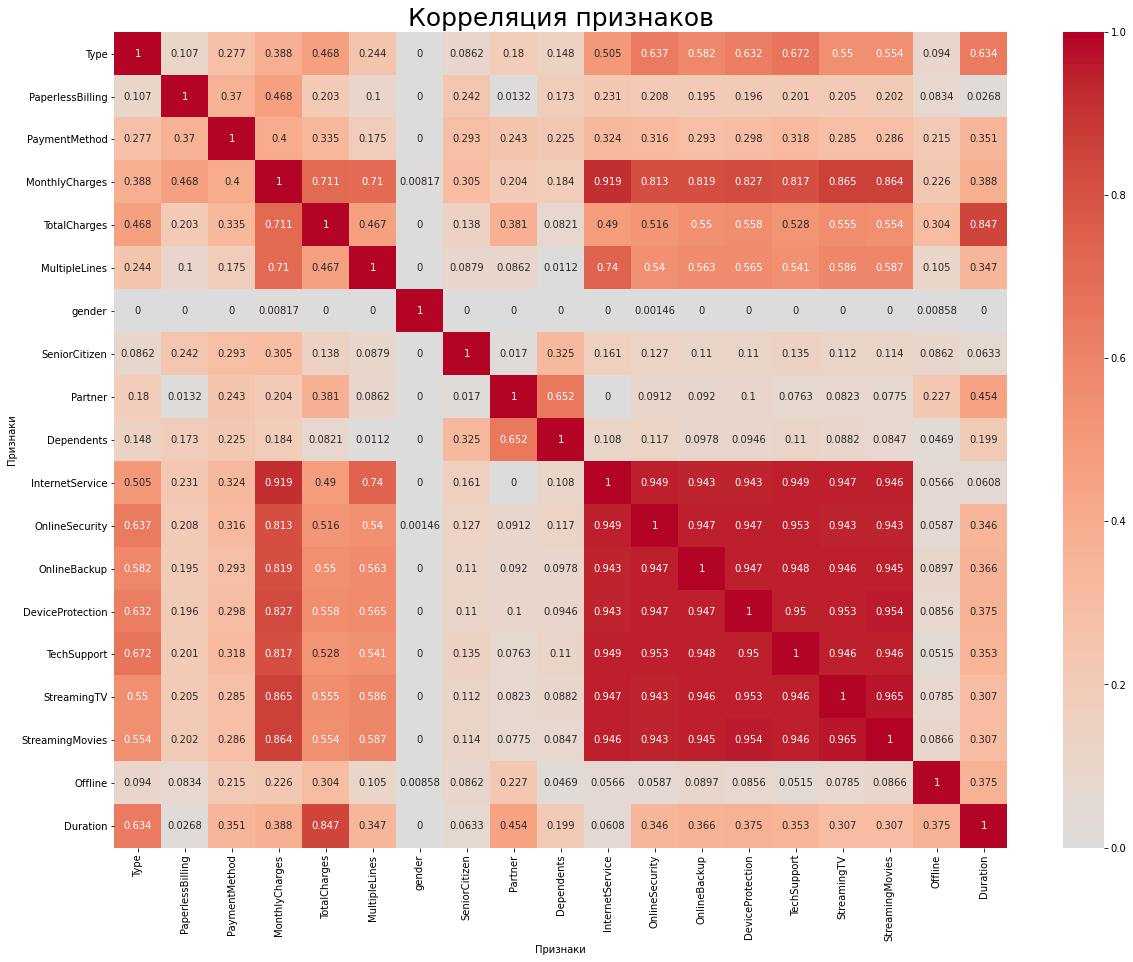

In [92]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Корреляция признаков', fontsize=25)
ax = sns.heatmap(df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Duration']), 
                 annot=True, 
                 cmap='coolwarm', 
                 center=0, 
                 fmt='.3g')
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

Не будем использовать стобец с общими затратами - он слишком сильно коррелирует с данными. Также удалим признак "пол", так как он по ранее исследованному ни на что не влияет. 

Также наблюдается высокая зависимость у признаков Streaming TV/movies - удалим их.

Еще аметна высокая корреляция между "Интернет-услугами". Для выбора признаков на удаление воспользуемся связью признаков с целевым. Получается, что меньшая свзяь у признаков "InternetService", "OnlineSecurity" и "TechSupport" - их мы тоже удалим.

In [93]:
df.drop(['TotalCharges', 
         'gender', 
         'StreamingTV', 
         'InternetService', 
         'OnlineSecurity', 
         'TechSupport',
         'DeviceProtection',
         'OnlineBackup'], axis=1, inplace=True)


Проверим корреляцию снова.

In [94]:
df.drop(['MultipleLines', 
         'StreamingMovies'], axis=1, inplace=True)


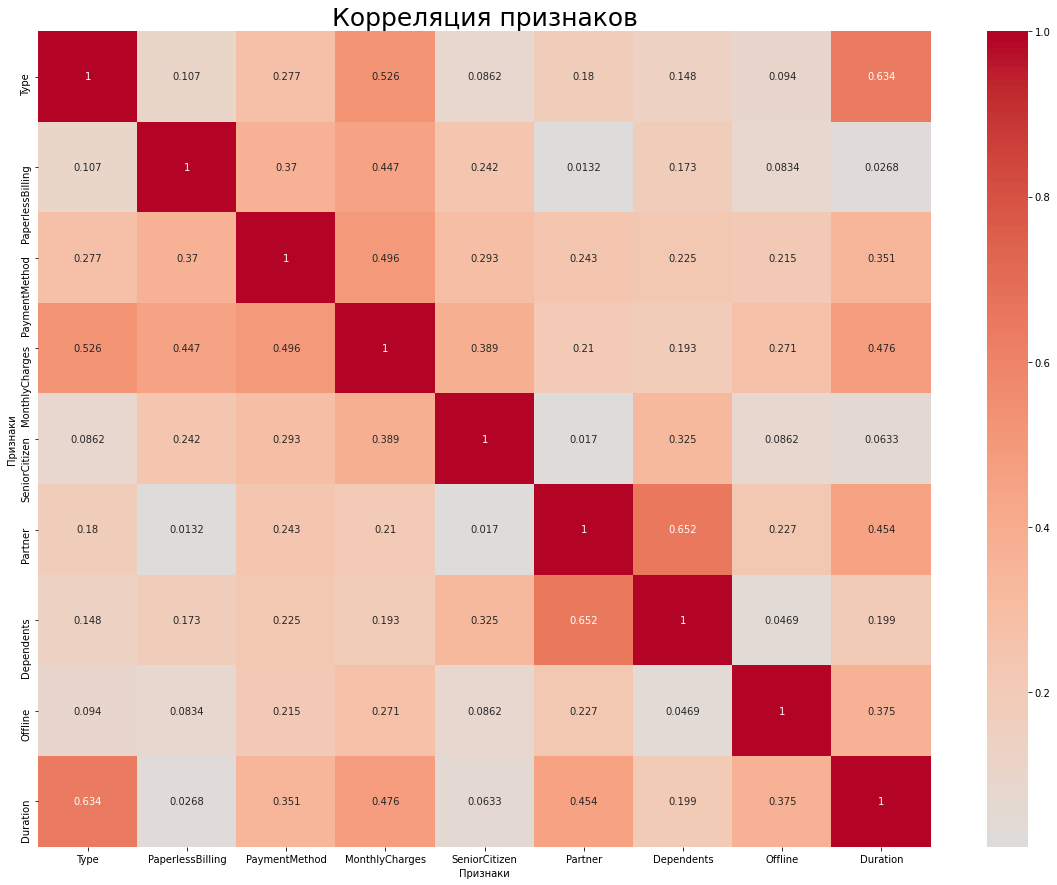

In [95]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Корреляция признаков', fontsize=25)
ax = sns.heatmap(df.phik_matrix(interval_cols=['TotalCharges', 'Duration']), 
                 annot=True, 
                 cmap='coolwarm', 
                 center=0, 
                 fmt='.3g')
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

От излишей корреляции избавились. Теперь можно переходить к выделению признаков для обучения.

### Обучение моделей

#### Обозначение признаков

Обозначим целевой и сопутствующие признаки. Целевым признаком у нас будет столбец Offline (ведь нам нужно спрогнозировать уйдет клиент из компании или нет), а сопутствующими - все остальные.

In [96]:
y = df['Offline']
X = df.drop(['Offline'], axis = 1)

Перейдем к разделению данных на выборки.

#### Разделение данных на выборки

Перед обучением разделим данные на тренировочную и тестовую выборки в пропорции 75/25

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [98]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

5282

5282

1761

1761


#### Кодирование признаков

Необходимо будет произвести кодирование и масштабирование признаков. 

Для модели Logistic Regression воспользуемся кодированием с помощью get_dummies.

Для "древесных моделей" и модели CatBoost воспользуемся OrdinalEncoder

Для модели LightGBM приведем признаки к категориям и воспользуемся OHE


Начнем с "древесных" моделей и CatBoost:

In [99]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = ['Type', 
               'PaperlessBilling', 
               'PaymentMethod', 
               'SeniorCitizen', 
               'Partner', 
               'Dependents']
encoder.fit(X_train[cat_columns])

X_train_f = X_train.copy()
X_test_f = X_test.copy()

X_train_cb = X_train.copy()
X_test_cb = X_test.copy()


X_train_f[cat_columns] = encoder.transform(X_train_f[cat_columns])
X_test_f[cat_columns] = encoder.transform(X_test_f[cat_columns])


In [100]:
X_train_cb[cat_columns] = encoder.transform(X_train_cb[cat_columns])
X_test_cb[cat_columns] = encoder.transform(X_test_cb[cat_columns])

In [101]:
y_train_f = y_train.copy()
y_test_f = y_test.copy()

y_train_cb = y_train.copy()
y_test_cb = y_test.copy()

У нас получились кодированные с помощью OrdinalEncoder признаки. Их мы передадим в "древесные" модели и CatBoost. 

Перейдем к признакам для модели light GBM - здесь необходимо передать каждой колонке тип данных "категория".

In [103]:
df_lgbm = df.copy()
df_lgbm = df_lgbm.astype({'Type' : 'category', 
                          'PaperlessBilling' : 'category', 
                          'PaymentMethod' : 'category', 
                          'SeniorCitizen' : 'category', 
                          'Partner' : 'category', 
                          'Dependents' : 'category'}) 

df_lgbm.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 9 columns):

 #   Column            Non-Null Count  Dtype   

---  ------            --------------  -----   

 0   Type              7043 non-null   category

 1   PaperlessBilling  7043 non-null   category

 2   PaymentMethod     7043 non-null   category

 3   MonthlyCharges    7043 non-null   float64 

 4   SeniorCitizen     7043 non-null   category

 5   Partner           7043 non-null   category

 6   Dependents        7043 non-null   category

 7   Offline           7043 non-null   int64   

 8   Duration          7043 non-null   int64   

dtypes: category(6), float64(1), int64(2)

memory usage: 207.3 KB


In [104]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(df_lgbm.drop('Offline',axis = 1),
                                             df_lgbm['Offline'],
                                             test_size = 0.25,
                                             random_state = random_state)

Признаки для LogisticRegression:

In [105]:
df_lr = pd.get_dummies(df.copy(), columns = ['Type', 
               'PaperlessBilling', 
               'PaymentMethod', 
               'SeniorCitizen', 
               'Partner', 
               'Dependents'], drop_first = True)

In [106]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df_lr.drop('Offline',axis = 1),
                                             df_lr['Offline'],
                                             test_size = 0.25,
                                             random_state = random_state)

In [107]:
import collections #импортируем метод для сравнения списков

In [108]:
if collections.Counter(X_train) == collections.Counter(X_test): 
    print ('Элементы выборки X_train и X_test равны') 
else: 
    print ('Элементы выборки X_train и X_test не равны') 


Элементы выборки X_train и X_test равны


Количество признаков в исходном датасете совпадает с количеством признаков в train и test сетах.

Признаки закодированны

Перейдем к обучению моделей. 

При обучении будем использовать **кросс-валидацию** и подбор наилучших гиперпараметров с помощью **случайного поиска**.

#### Логистическая регрессия

In [109]:
%%time
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr_params = dict(C=np.arange(1, 20, 1))
rs_lr = RandomizedSearchCV(lr, lr_params, scoring='roc_auc', random_state=random_state)
rs_lr.fit(X_train_lr, y_train_lr)
best_params_lr = rs_lr.best_params_
best_score_lr = rs_lr.best_score_

print("Лучшая метрика AUC_ROC с лучшими гиперпараметрами:")
print()
print(best_score_lr)

Лучшая метрика AUC_ROC с лучшими гиперпараметрами:



0.7327268746013779

CPU times: user 2.56 s, sys: 5.24 s, total: 7.79 s

Wall time: 7.72 s


#### Дерево решений

In [110]:
%%time
dt = DecisionTreeClassifier(random_state=random_state) 
depth = [None] + [i for i in range(2, 11)]
dt_params = [{'criterion':['gini', 'entropy'], 
          'max_depth':depth}]

rs_dt = RandomizedSearchCV(dt, dt_params, scoring='roc_auc', cv=5, n_iter=100, random_state=random_state, n_jobs=-1)
rs_dt.fit(X_train_f, y_train_f)
best_params_dt = rs_dt.best_params_
best_score_dt = rs_dt.best_score_
print("Лучшие гиперпараметры для модели:")
print()
print(best_params_dt)
print()
print("Лучшая метрика AUC_ROC с лучшими гиперпараметрами:")
print()
print(best_score_dt)

Лучшие гиперпараметры для модели:



{'max_depth': 6, 'criterion': 'gini'}



Лучшая метрика AUC_ROC с лучшими гиперпараметрами:



0.795111836410228

CPU times: user 1.18 s, sys: 11.6 ms, total: 1.19 s

Wall time: 1.19 s


#### Случайный лес

In [111]:
%%time
rf = RandomForestClassifier(random_state = random_state)
rf_params = dict(n_estimators=np.arange(10, 500, 20),
              max_depth=np.arange(2,11,1))
rs_rf = RandomizedSearchCV(rf, rf_params, scoring='roc_auc', cv=5, n_iter=100, random_state=random_state, n_jobs=-1)
rs_rf.fit(X_train_f, y_train_f)
best_params_rf = rs_rf.best_params_
best_score_rf = rs_rf.best_score_
print("Лучшие гиперпараметры для модели:")
print()
print(best_params_rf)
print()
print("Лучшая метрика AUC_ROC с лучшими гиперпараметрами:")
print()
print(best_score_rf)

Лучшие гиперпараметры для модели:



{'n_estimators': 470, 'max_depth': 7}



Лучшая метрика AUC_ROC с лучшими гиперпараметрами:



0.8322529111639758

CPU times: user 5min 31s, sys: 2.1 s, total: 5min 33s

Wall time: 5min 35s


#### CatBoost Classifier

In [112]:
%%time
train_pool = Pool(X_train_cb, y_train_cb)
cb = CatBoostClassifier(loss_function='Logloss',
                        eval_metric ='AUC:hints=skip_train~false',
                        auto_class_weights='Balanced',
                        verbose=False,
                        random_state=random_state)   #запустим модель на пуле из тренировочных данных и найдем лучшие параметры
cb_params = dict(learning_rate = [0.1, 1, 0.01],
                 depth=np.arange(2,11,1),
                 l2_leaf_reg = [1, 3, 5, 7, 9])

rs_cb = cb.grid_search(cb_params,
                       train_pool,
                       cv = 3,
                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



bestTest = 0.9165550681

bestIteration = 904



0:	loss: 0.9165551	best: 0.9165551 (0)	total: 2.01s	remaining: 4m 29s



bestTest = 0.9149926884

bestIteration = 184



1:	loss: 0.9149927	best: 0.9165551 (0)	total: 3.17s	remaining: 3m 30s



bestTest = 0.8288078196

bestIteration = 998



2:	loss: 0.8288078	best: 0.9165551 (0)	total: 4.44s	remaining: 3m 15s



bestTest = 0.9108904795

bestIteration = 927



3:	loss: 0.9108905	best: 0.9165551 (0)	total: 5.76s	remaining: 3m 8s



bestTest = 0.9209574386

bestIteration = 195



4:	loss: 0.9209574	best: 0.9209574 (4)	total: 6.96s	remaining: 3m 1s



bestTest = 0.8267105364

bestIteration = 994



5:	loss: 0.8267105	best: 0.9209574 (4)	total: 8.23s	remaining: 2m 57s



bestTest = 0.9122604479

bestIteration = 999



6:	loss: 0.9122604	best: 0.9209574 (4)	total: 9.57s	remaining: 2m 54s



bestTest = 0.9182021088

bestIteration = 96



7:	loss: 0.9182021	best: 0.9209574 (4)	total: 10.8s	remaining: 2m 51s



bestTest = 0.8264026784

bestIter

In [113]:
print("Лучшие гиперпараметры для модели:")
print()
print(rs_cb['params'])

Лучшие гиперпараметры для модели:



{'depth': 2, 'learning_rate': 1, 'l2_leaf_reg': 9}


In [114]:
%%time
cb = CatBoostClassifier(loss_function='Logloss',
                        depth = 2,
                        l2_leaf_reg = 9,
                        learning_rate = 1,
                        eval_metric ='AUC:hints=skip_train~false',
                        auto_class_weights='Balanced',
                        verbose=False,
                        random_state=random_state)
cb.fit(train_pool)
best_score_cb = cross_val_score(cb, X_train_cb, y_train_cb, cv=3, scoring='roc_auc')
print()
print("Лучшая метрика AUC_ROC с лучшими гиперпараметрами:")
print()
print(best_score_cb.mean())



Лучшая метрика AUC_ROC с лучшими гиперпараметрами:



0.9207843783524079

CPU times: user 4.63 s, sys: 284 ms, total: 4.91 s

Wall time: 7.58 s


#### LightGBM Classifier

In [115]:
%%time
train_dataset = lgbm.Dataset(X_train_lgbm, y_train_lgbm)
test_dataset = lgbm.Dataset(X_test_lgbm, y_test_lgbm)
lgb = lgbm.LGBMClassifier(class_weight='balanced')

lgb_params = {'max_depth': np.arange(2,11,1), 
              'learning_rate': np.arange(0.1, 1, 0.01)}

CPU times: user 203 µs, sys: 5 µs, total: 208 µs

Wall time: 234 µs


In [116]:
%%time
lgb_rs = RandomizedSearchCV(lgb, lgb_params, scoring='roc_auc', random_state=random_state, verbose=True)
lgb_rs.fit(X_train_lgbm, y_train_lgbm)

best_score_lgb = lgb_rs.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits

CPU times: user 3min 19s, sys: 1.18 s, total: 3min 20s

Wall time: 3min 23s


In [117]:
print("Лучшие гиперпараметры для модели:")
print()
print(lgb_rs.best_params_)
print()
print("Лучшая метрика AUC_ROC с лучшими гиперпараметрами:")
print()
print(best_score_lgb)

Лучшие гиперпараметры для модели:



{'max_depth': 2, 'learning_rate': 0.6299999999999997}



Лучшая метрика AUC_ROC с лучшими гиперпараметрами:



0.891467873300394


#### Итог

Итого, у нас получились следующие метрики AUC:

In [118]:
index = ['Logistic Regression',
         'RandomForest Classifier',
         'DecisionTree Classifier',
         'CatBoost Classifier',
         'LightGBM Classifier']
scores = {'Метрика AUC на тренировочной выборке с кросс-валидацией':[best_score_lr,
                                                                     best_score_rf,
                                                                     best_score_dt,
                                                                     best_score_cb.mean(),
                                                                     best_score_lgb]}

date_1 = pd.DataFrame(data=scores, index=index)
date_1

,Метрика AUC на тренировочной выборке с кросс-валидацией
Logistic Regression,0.732727
RandomForest Classifier,0.832253
DecisionTree Classifier,0.795112
CatBoost Classifier,0.920784
LightGBM Classifier,0.891468


Лучше всех показала себя модель **CatBoost Classifier** с метрикой, равной 0.92. Проверим ее на тестовой выборке.

### Тестирование лучшей модели

#### Тест CatBoostClassifier

Лучшей метрикой AUC ROC оказалась метрика на модели CatBoost Classifier. Чтобы понять так ли она хороша - проверим ее на тестовой выборке данных.

In [119]:
%%time
cb_test = CatBoostClassifier(loss_function='Logloss',
                             depth = 2,
                             l2_leaf_reg = 9,
                             learning_rate = 1,
                             eval_metric ='AUC:hints=skip_train~false',
                             auto_class_weights='Balanced',
                             verbose=False,
                             random_state=random_state)
cb_test.fit(X_train_cb, y_train_cb)
probs_test_cb = cb_test.predict_proba(X_test_cb)
probs_one_test_cb = probs_test_cb[:,1]                                 
test_auc_cb = roc_auc_score(y_test_cb, probs_one_test_cb)                                  
preds_test_cb = cb_test.predict(X_test_cb)
test_accuracy_cb = accuracy_score(y_test_cb, preds_test_cb)
print('Метрика AUC_ROC для модели CatBoost на тестовой выборке составляет:', 
     "%.3f" %test_auc_cb)
print('Метрика точности для модели CatBoost на тестовой выборке составляет:',
     "%.3f" %test_accuracy_cb)

Метрика AUC_ROC для модели CatBoost на тестовой выборке составляет: 0.908

Метрика точности для модели CatBoost на тестовой выборке составляет: 0.899

CPU times: user 1.53 s, sys: 85.1 ms, total: 1.61 s

Wall time: 2.91 s


Итак, метрика AUC_ROC на тестовой выборке оказалась равной 0,9. 

Метрика точности прогнозов (accuracy) показывает во скольких случаях в процентном соотношении наша модель дала верный ответ. То есть, на основании метрики можно сказать, что наша модель дает правильные ответы в 89,9% случаев. Но оценка точности предсказаний не очень полезна - гораздо лучше передает итоговое качество модели метрика AUC_ROC.

#### Оценка важности признаков

С помощью метода get_feature_importance построим гистограмму важности признаков при тестировании модели. Возможно, какие-то из них не такие значительные и их можно убрать.

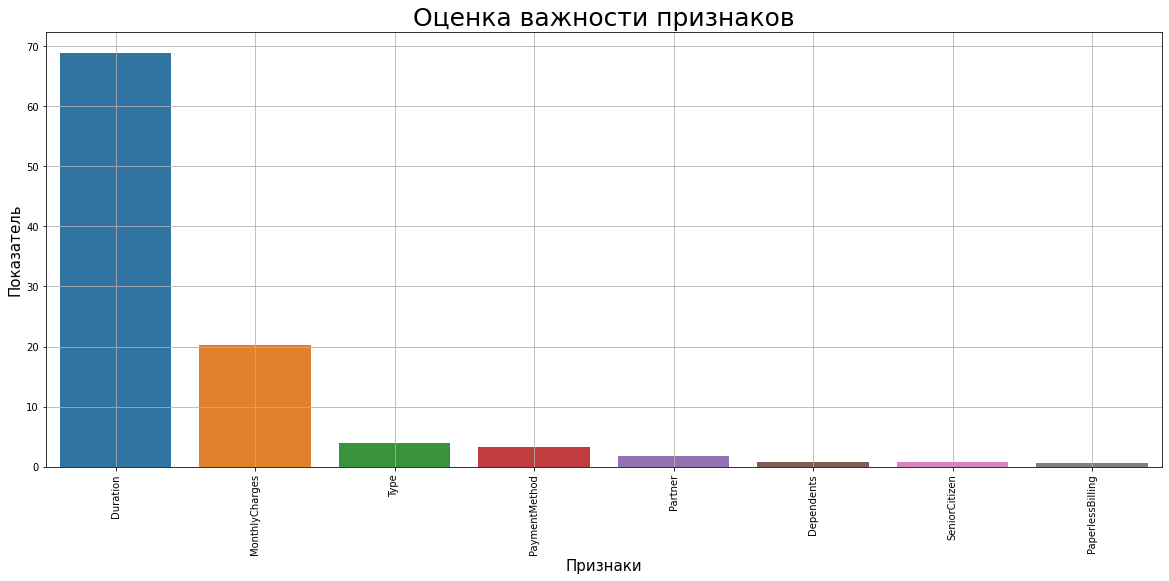

In [122]:
plt.figure(figsize=[20, 8])
plt.title('Оценка важности признаков', fontsize=25)
plot = sns.barplot(x='Feature Id', y='Importances', data=cb_test.get_feature_importance(train_pool, prettified = True))
plt.ylabel('Показатель', fontsize=15)
plt.xlabel('Признаки', fontsize=15)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Как мы видим из графика - многие признаки не являются значительными, но я считаю, что убирать их не имеет особого смысла - так модель делает предсказания исходя из многих факторов, а при удалении этих факторов станет меньше. Более того - метрика AUC достаточно высока. Наиболее значимыми являются признаки длительности контракта, месячных затрат, и, можно сказать, что типа оплаты. Также влияет наличие партнера у клиента. 

Наименее значимые признаки - все остальные, но, как говорилось выше, удалять их все-таки не стоит.

#### ROC кривая

По горизонтали нанесём долю ложноположительных ответов (FPR), а по вертикали — долю истинно положительных ответов (TPR). Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

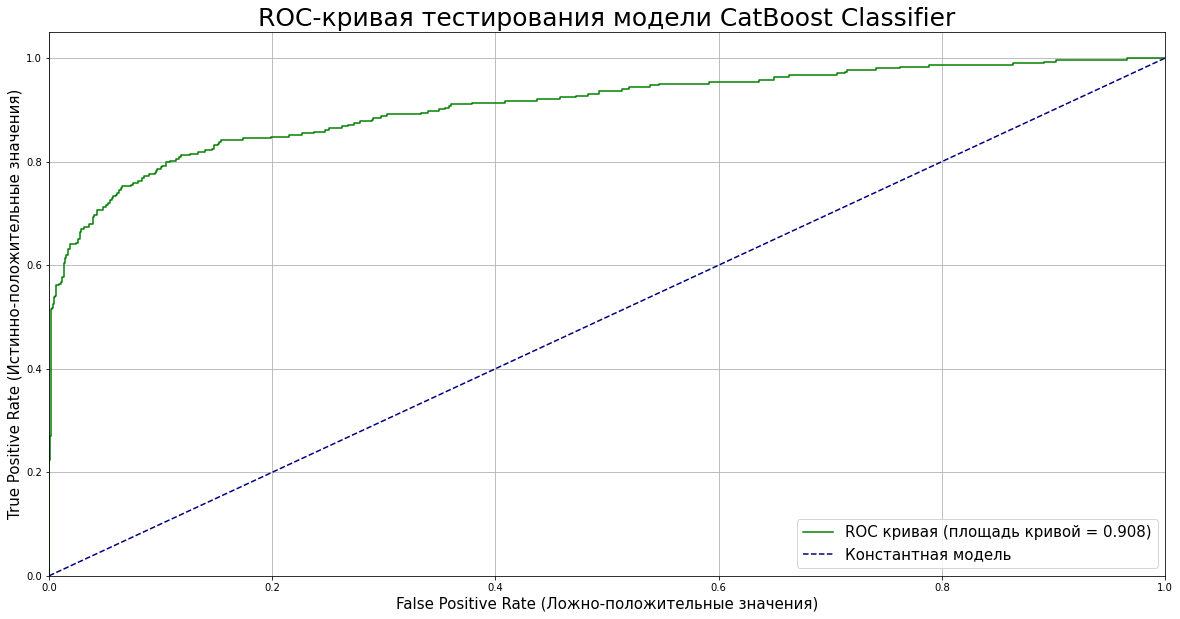

In [123]:
fpr, tpr, treshold = roc_curve(y_test_cb, probs_one_test_cb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[20,10])
plt.plot(fpr, tpr, color='g',
         label='ROC кривая (площадь кривой = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'Константная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Ложно-положительные значения)', fontsize=15)
plt.ylabel('True Positive Rate (Истинно-положительные значения)', fontsize=15)
plt.title('ROC-кривая тестирования модели CatBoost Classifier', fontsize = 25)
plt.legend(loc="lower right", fontsize=15)
plt.grid(True)
plt.show()

Как мы видим на графике - наша модель хорошо обучена и очень сильно отличается от константной модели (пунктирная линия). Теперь построим матрицу ошибок, которая есть в библиотеке catboost.

#### Матрица ошибок

In [124]:
cm = get_confusion_matrix(cb_test, Pool(X_test_cb, y_test_cb))
print(cm)

[[1356.  102.]

 [  75.  228.]]


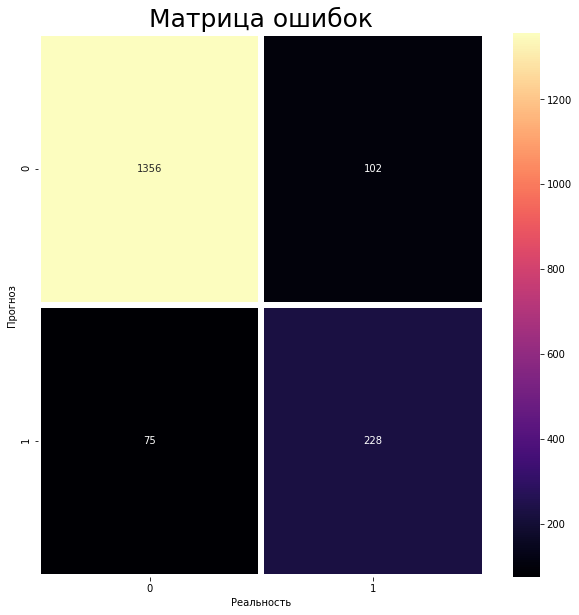

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица ошибок', fontsize=25)
ax = sns.heatmap(cm, 
                 annot=True, 
                 cmap="magma", 
                 linewidths=5, 
                 fmt='.4g')
plt.ylabel('Прогноз')
plt.xlabel('Реальность')
plt.show()

По данной матрице можно сказать, что модель 1356 раз правильно классифицировала положительный ответ, как положительный, а 102 раз неправильно классифицировала положительный ответ, как отрицательный.

75 раза модель неправильно классифицировала отрицательный ответ, как положительный, а 228 раза - правильно (отрицательный, как отрицательный)

Безусловно, модель нуждается в небольшой доработке, но с имеющимися данными - это лучшее, что можно предложить заказчику.

#### Итог

**Подытожим**

Мы проверили модель на тестовой выборке - она показала очень хорошую метрику AUC - 0,903. 

Метрика точности прогнозов модели составила 90,3%.

Также, мы проверили что прогнозы нашей модели значительно отличаются от прогноза константной - это видно благодаря графику ROC-кривой. Исходя из матрицы ошибок сделали вывод, что данная модель делает прогнозы с высокой точностью. 

Таким образом, модель CatBoost Classifier, хоть и нуждается в небольшой доработке, можно смело рекомендовать заказчику для решения его бизнес-вопросов.

## Отчет

**Итоговый вывод и отчет по проделанной работе**

Перед нами стояла задача **спрогнозировать отток клиентов из компании «Ниединогоразрыва.ком»**. Для этого нам предоставили 4 датасета, содержащие информацию о клиентах:
- 1 датасет состоит из персональной информации (пол, наличие детей итд.)
- 2 датасет состоит из информации о контракте
- 3 датасет включает информацию об Интернет-услугах, предоставляемых пользователям (стриминговые сервисы, онлайн хранилища итд.)
- 4 датасет показывает информацию о пользовании телефонными услугами

Для работы над поставленной задачей нам был необходимо:
- изучить информацию из датасетов
- предобработать имеющиеся данные
- провести комплексный исследовательский анализ данных, чтобы понять закономерности и особенности
- подготовить данные для обучения моделями
- обучить несколько моделей прогнозирования
- выбрать из них лучшую и проверить ее
- интерпретировать результаты обучения

Все 4 датасета были выгружены, по каждому из них было выведено описание - сразу было выявлено расхождение в размерах. Датсеты были проверены на пропуски - их не оказалось. Также были выявлены неподходящие нам типы значений, которые было решено привести к подходящим и понятным для анализа (время привести к формату datetime, а значения 0/1 заменить на No/Yes).

**Во время предобработки данных мы:**
- объединили 4 датасета в один для удобства дальнейшего анализа
- обработали пропуски (заменили пропущенные значения услуг на 'NotUsed', так как мы предположили ранее, что если стоит пропуск - вероятнее всего, услугой просто не пользовались)
- выделили целевой признак  по принципу - если в датасете отсутствует дата окончания контракта (стоит "Нет"), то клиент находится в компании. Если дата присутствует и не стоит "Нет", то клиент ушел
- поменяли, в соответствии с намеченными шагами, форматы дат/времени, значения 0/1 заменили на No/Yes, столбец с общими тратами сделали числовым
- заменили пропущенные значения в общих затратах месячными (так как эти строки отражают недавно подключенных клиентов)
- проверили данные на наличие дубликатов - таковых не оказалось
- проверили данные на наличие выбросов - такие были только в колонке с общими тратами. Можно сделать предположение, что изначально, когда компания только выходила на рынок (13-14 года, Интернет-сервисы набирают популярность), при подключении клиентов предоставлялись каие-либо пакетные бонусы на пользование дополнительными услугами, а после люди попросту забывали отключать их, отсюда и самые "дорогие" - это самые "старые" договоры, которые действуют до сих пор

**Затем приступили к исследовательскому анализу данных, он показал следующее:**
- большинство новых подключений пришлось на начало 2014 года, что может быть обусловлено резким ростом пользования услугами связи, а также первым проведением новогодних промоакций на подключение. Следющий рост новых пользователей фиксируется в конце 2019 года
- отток клиентов достигает своего пика в 2018-2019 годах, что может говорить о множестве конкурентов у компании, а таже отсутствии каких-либо интересных для пользователей предложений и промоакций
- наиболее популярные услуги это интернет и телефония. Они были самыми востребованными и в начале деятельности компании, остаются самыми востребоваными и по сей день
- от семейного положения/возраста/наличия детей/пола популярность Интернета не зависит - он является самой популярной услугой. Клиенты пенсионного возраста, в отличие от всех остальных, предпочитают телефонию на втором месте, но значения там незначительные. В целом, по общей картине, можно сказать, что самые популярные услуги у различных групп - Интернет и стриминговые сервисы (кино и ТВ)
- наибольшей популярностью все равно пользуется интернет, так как является не просто развлекательным, но и очень важным информационным ресурсом для большого количества людей
- самый популярный тип оплаты услуг компании - ежемесячный, причем подавляющее большинство пользуется безналичным способом оплаты 

**При подготовке данных для обучения мы:**
- добавили признак "длительность контракта", рассчитанный как разница даты окончания и даты начала контракта
- целевой признак, для удобства исследовательского анализа вывели раньше, чем задумывалось по плану
- избавились от мультиколлинеарности между признаками и вывели итоговый массив данных для обучения

**Затем, на этапе обучения моделей мы:**
- обозначили, что целевым признаком у нас будет столбец Offline (клиент ушел из компании), а сопутствующими - все остальные
- разделили данные на выборки в пропорциях тренировочная к тестовой, как 3/1
- выполнили кодирование и масштабирование признаков
- обучили 5 моделей прогнозирования на тренировочной выборке, нашли лучшие гиперпараметры и вывели метрики качества на кросс-валидации

**Лучшую модель мы:**
- проверили на тестовом наборе данных
- проверили на адекватность путем сравнения с константной моделью
- оценили важность признаков обучения
- вывели и интерпретировали метрики качества обучения
- визуализировали и пояснили матрицу ошибок

**Основная трудность была в том, что датасеты были не одинакового размера - к примеру, в данных с наименованием некоторых услуг стояли пропуски, что может говорить о том, что не все пользователи пользовались полным объемом предоставляемых услуг компании - это совершенно нормальная практика. С этой задачей мы справились успешно.**

**Также, мы решили выделить целевой признак перед подготовкой данных, так как при выделении его после - данные уже будут со значениями-заглушками (в столбце "дата окончания контракта"), что может некорректно сказаться на дальнейшем использовании полученной модели вне конкретно этого датасета. Поэтому, мы поступили так, чтобы исключить привязанность к конкретной дате при прогнозировании оттока клиентов из компании.**

Для обучения моделей нами были выбраны **следующие признаки:**
- **целевой**: "уйдет ли клиент" (для этого был добавлен новый столбец 'Offline', означающий, что клиент ушел.


- **сопутствующие**: Тип подключения', 'Безналичная оплата', 'Способ оплаты', 'Пенсионный возраст', 'Замужем/женат', 'Наличие детей', "Длительность контракта"

Все остальные признаки, которые были в изначальном датасете мы удалили, потому что между ними наблюдалась очень сильная зависимость - это негативно скажется на результате работы модели.

Целевой признак мы вывели по принципу - если в датасете отсутствует дата окончания контракта (стоит "Нет"), то клиент находится в компании. Если дата присутствует и не стоит "Нет", то клиент ушел.

Признак длительности мы добавили и посчитали как разность даты окончания и начала контракта.

Все признаки были закодированы для обучения моделей по-своему:

- Для модели Logistic Regression воспользуемся кодированием с помощью get_dummies.

- Для "древесных моделей" и модели CatBoost воспользуемся OrdinalEncoder

- Для модели LightGBM приведем признаки к категориям и воспользуемся OHE

**Во время предобработки данных** мы столкнулись с тем, что в данных есть пропуски у некоторых услуг - для их заполнения мы ввели значение "Не пользовались", чтобы не нарушать логическую картину.

На этом же этапе нами был выделен целевой признак "Offline", принимающий значение 1 (клиент ушел), если в столбце с датой окончания контракта стоит дата, и 0 (клиент не ушел), если в столбце стоит "No".

Также мы привели даты к формату datetime, а числа к float.

После проанализировали данные на предмет выбросов и аномалий - такие были только в колонке с общими тратами. Можно сделать предположение, что изначально, когда компания только выходила на рынок (13-14 года, Интернет-сервисы набирают популярность), при подключении клиентов предоставлялись каие-либо пакетные бонусы на пользование дополнительными услугами, а после люди попросту забывали отключать их, отсюда и самые "дорогие" - это самые "старые" договоры, которые действуют до сих пор.

**Сводная таблица с результатми обучения моделей на кросс-валидации**

In [126]:
print(date_1)

                         Метрика AUC на тренировочной выборке с кросс-валидацией

Logistic Regression                                               0.732727      

RandomForest Classifier                                           0.832253      

DecisionTree Classifier                                           0.795112      

CatBoost Classifier                                               0.920784      

LightGBM Classifier                                               0.891468      


Как мы видим из выведенной таблицы - **наибольшая метрика AUC_ROC (0,92) у модели CatBoost Classifier с гиперпараметрами {'depth': 2, 'learning_rate': 1, 'l2_leaf_reg': 9}**

Ее мы и решили протестировать.

На тестовой выборке ее метрики следующие:

In [127]:
print('Метрика AUC_ROC для модели CatBoost на тестовой выборке составляет:', 
     "%.3f" %test_auc_cb)
print('Метрика точности для модели CatBoost на тестовой выборке составляет:',
     "%.3f" %test_accuracy_cb)

Метрика AUC_ROC для модели CatBoost на тестовой выборке составляет: 0.908

Метрика точности для модели CatBoost на тестовой выборке составляет: 0.899


Итого, по метрике "Точности" модель дает правильные ответы в 89,9% случаев. Затем мы рассмотрели матрицу ошибок, чтобы понять в чем часто модель ошибается

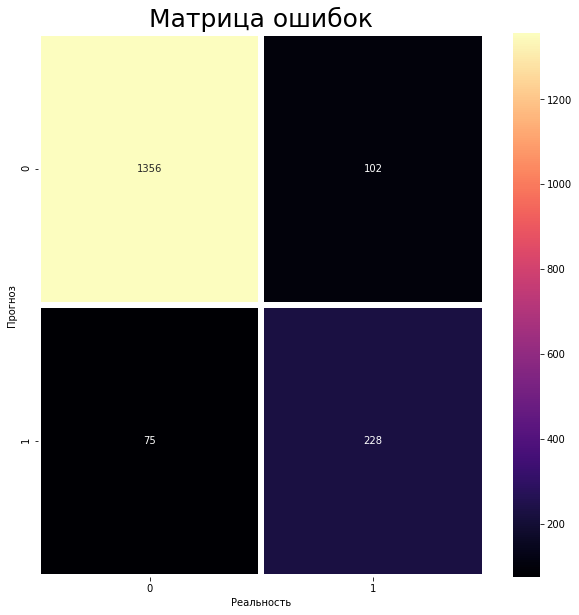

In [128]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица ошибок', fontsize=25)
ax = sns.heatmap(cm, 
                 annot=True, 
                 cmap="magma", 
                 linewidths=5, 
                 fmt='.4g')
plt.ylabel('Прогноз')
plt.xlabel('Реальность')
plt.show()

**По матрице ошибок вывод следующий:**
- модель 1356 раз правильно классифицировала положительный ответ, как положительный, а 102 раз неправильно классифицировала положительный ответ, как отрицательный.

- 75 раза модель неправильно классифицировала отрицательный ответ, как положительный, а 228 раза - правильно (отрицательный, как отрицательный)

Безусловно, модель нуждается в небольшой доработке, но с имеющимися данными - это лучшее, что можно предложить заказчику.

Также мы решили оценить важност признаков для обучения модели. Для этого построили график.

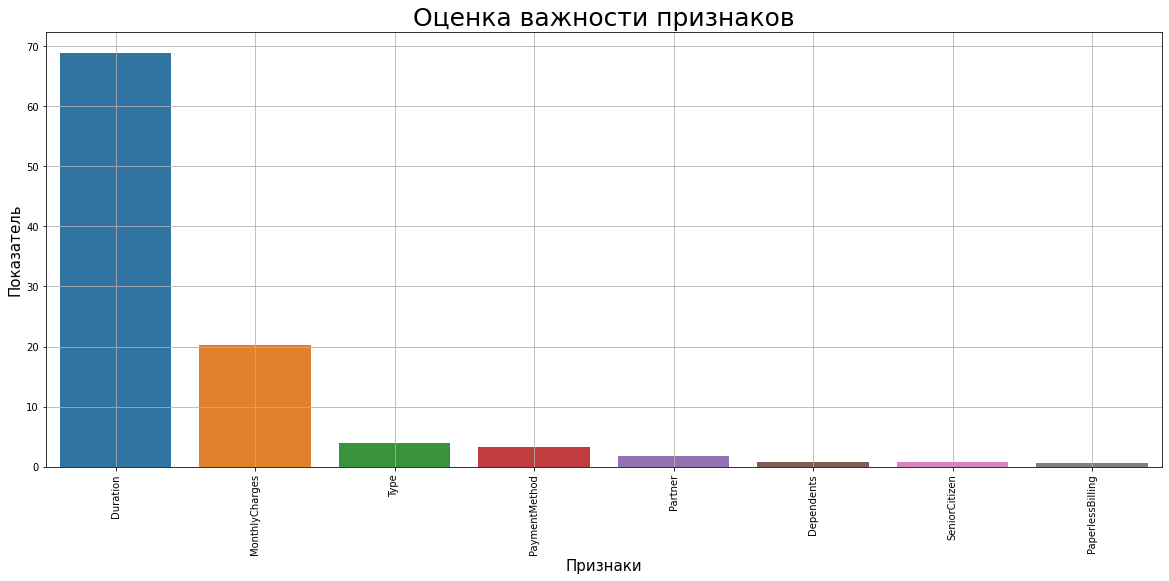

In [129]:
plt.figure(figsize=[20, 8])
plt.title('Оценка важности признаков', fontsize=25)
plot = sns.barplot(x='Feature Id', y='Importances', data=cb_test.get_feature_importance(train_pool, prettified = True))
plt.ylabel('Показатель', fontsize=15)
plt.xlabel('Признаки', fontsize=15)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

На графике видно, что многие признаки действительно незначительные. Но убирать их не имеет особого смысла - так модель делает предсказания исходя из многих факторов, а при удалении - этих факторов станет меньше. 

Более того - метрика AUC достаточно высока. 

Наиболее значимыми являются признаки длительности контракта, месячных затрат, и, можно сказать, что типа оплаты. Также влияет наличие партнера у клиента. 

Наименее значимые признаки - все остальные, но, как говорилось выше, удалять их все-таки не стоит.

Таким образом нами была проделана работа по созданию, обучению и тестированию модели прогнозирования оттока клиентов. Лучшая модель, найденная нами, показала довольно высокие результаты, поэтому ее можно использовать для решения дальнейших бизнес-задач.